In [1]:
import logging
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyobsbox import Checker

In [3]:
logging.getLogger("pyobsbox").setLevel(logging.WARNING)
logging.getLogger("pyobsbox.plotter").setLevel(logging.DEBUG)

# List models

In [4]:
models_folder = Path("../../models")

In [5]:
[model.name for model in list(models_folder.glob('model_*'))]

['model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_abs_diff_seed_42',
 'model_dense_512_128_32_8_B1H_Inst_center_scale_100_seed_42',
 'model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_seed_42',
 'model_time_dist_32_16_B1H_Inst_500',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_stride_4_B1H_Inst',
 'model_conv_32_16_stride_4_B1H_Inst_jorg',
 'model_conv_max_pool_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_1000_seed_42',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_2049_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_10000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_1000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_znorm_seed_42',
 'model_conv_32

In [6]:
model_path = models_folder / "model_conv_64_32_16_8_stride_4_B1H_Inst_min_max_abs_diff_seed_42"

In [7]:
checker = Checker(model_path)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 512, 64)           512       
_________________________________________________________________
dropout (Dropout)            (None, 512, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 128, 32)           14368     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 32, 16)            3600      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 16)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 8)              9

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

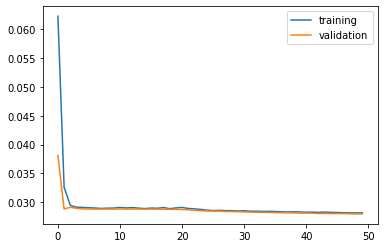

In [8]:
checker.plot_loss()

In [9]:
train_data, train_meta = checker.load_train_dataset()
train_prediction = checker.predict(train_data)

bunch_sorted_index: [2 1 0]
group_bunches: [578. 309. 238.]
group_bunches sorted: [238. 309. 578.]
restore_index: [2 1 0]
group_bunches restored: [578. 309. 238.]
bunch_sorted_index: [2 0 1]
group_bunches: [ 642. 1926.  452.]
group_bunches sorted: [ 452.  642. 1926.]
restore_index: [1 2 0]
group_bunches restored: [ 642. 1926.  452.]
bunch_sorted_index: [0 2 1]
group_bunches: [ 163. 2479. 1923.]
group_bunches sorted: [ 163. 1923. 2479.]
restore_index: [0 2 1]
group_bunches restored: [ 163. 2479. 1923.]

50/50 [==============================] - 59s 1s/step


In [10]:
train_meta.head()

type  fill  beam plane  q           date_time  \
4033  Inst  6711     1     h  7 2018-05-22 12:06:14   
2040  Inst  7491     1     h  7 2018-12-02 09:55:15   
2511  Inst  7464     1     h  7 2018-11-22 04:45:14   
4394  Inst  7454     1     h  7 2018-11-19 01:04:17   
415   Inst  6892     1     h  7 2018-07-07 13:59:16   

                                                   file  n_bunches  \
4033  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6711/...       2556   
2040  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7491/...        733   
2511  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7464/...        460   
4394  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7454/...        648   
415   /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6892/...       1452   

      bunch_index  bunch_number  ts_length  chunk  
4033        439.0         288.0      65536     15  
2040       1915.0         403.0      65536      7  
2511        631.0          82.0      65536      9  
4394        531.0          97.0      65536     17  
415         432.0         166.0      65536      1

In [11]:
train_meta.shape

(409600, 12)

In [12]:
train_data.shape

(409600, 2048, 1)

In [13]:
train_prediction.shape

(409600, 2048, 1)

In [14]:
validation_data, validation_meta = checker.load_validation_dataset()
validation_prediction = checker.predict(validation_data)


5/5 [==============================] - 5s 968ms/step


In [15]:
validation_meta.head()

type  fill  beam plane  q           date_time  \
5919  Inst  6356     1     h  7 2017-11-02 03:24:14   
4360  Inst  7483     1     h  7 2018-11-29 10:37:14   
5491  Inst  7133     1     h  7 2018-09-07 12:06:14   
5069  Inst  6628     1     h  7 2018-05-01 06:36:15   
2324  Inst  6620     1     h  7 2018-04-29 00:19:15   

                                                   file  n_bunches  \
5919  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6356/...       1868   
4360  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7483/...        648   
5491  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7133/...        636   
5069  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6628/...       1551   
2324  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6620/...       1227   

      bunch_index  bunch_number  ts_length  chunk  
5919       3349.0        1805.0      65536     23  
4360        513.0          93.0      65536     17  
5491        706.0         515.0      65536     21  
5069       2162.0         985.0      65536     19  
2324        284.0         146.0      65536      9

In [16]:
validation_meta.shape

(40960, 12)

In [17]:
validation_data.shape

(40960, 2048, 1)

In [18]:
validation_prediction.shape

(40960, 2048, 1)

In [19]:
def plot_train_index(index: int):
    """Helper function to plot a sample from the train dataset.
    """
    true_signal = train_data[index]
    predicted_signal = train_prediction[index]
    metadata_row = train_meta.iloc[index]
    print(f"index: {index}")
    print(f"Error: {train_error[index]}")
    print(metadata_row)
    checker.plot_sample(metadata_row, true_signal, predicted_signal)
    plt.show()
    encoded = checker.encode(true_signal)
    plt.imshow(encoded)
    plt.show()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

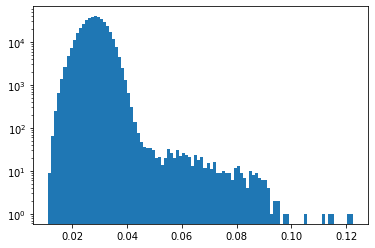

In [20]:
train_error = checker.MSE(train_data, train_prediction)
checker.plot_error(train_error, bins=100)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

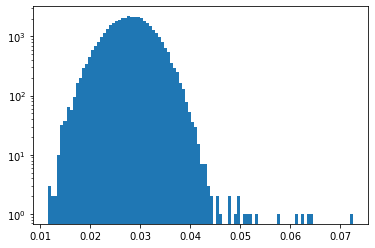

In [21]:
validation_error = checker.MSE(validation_data, validation_prediction)
checker.plot_error(validation_error, bins=100)

In [22]:
# Histogram peak
hist, bins = np.histogram(train_error, bins=100)
hist_peak = bins[np.argmax(hist)]

index: 0
Error: 0.028578710050040507
type                                                         Inst
fill                                                         6711
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-22 12:06:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6711/...
n_bunches                                                    2556
bunch_index                                                   439
bunch_number                                                  288
ts_length                                                   65536
chunk                                                          15
Name: 4033, dtype: object


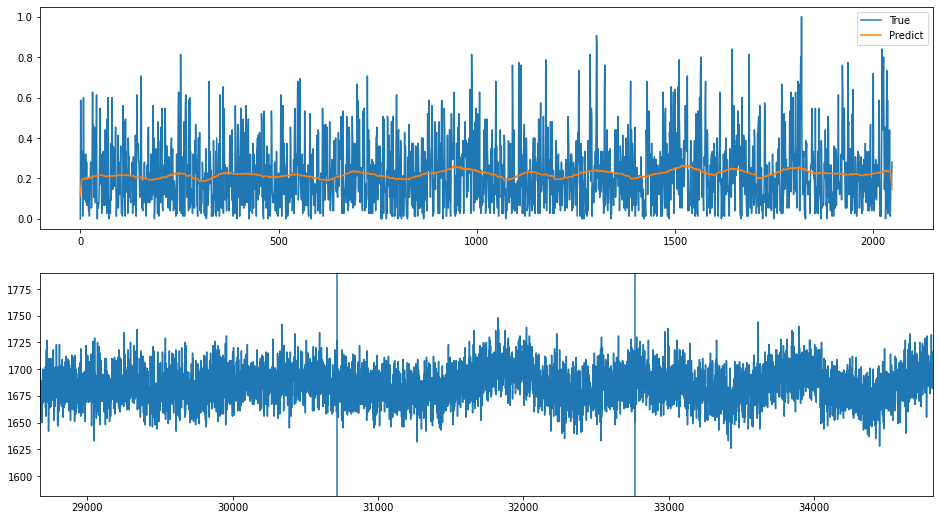

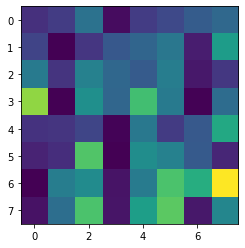

In [23]:
# plotting a random sample
plot_train_index(0)

In [24]:
sorted_error_indices = np.argsort(train_error)

# From left to right

index: 311260
Error: 0.011172580683215654
type                                                         Inst
fill                                                         6890
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-06 01:43:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6890/...
n_bunches                                                    1452
bunch_index                                                   860
bunch_number                                                  353
ts_length                                                   65536
chunk                                                          21
Name: 5597, dtype: object


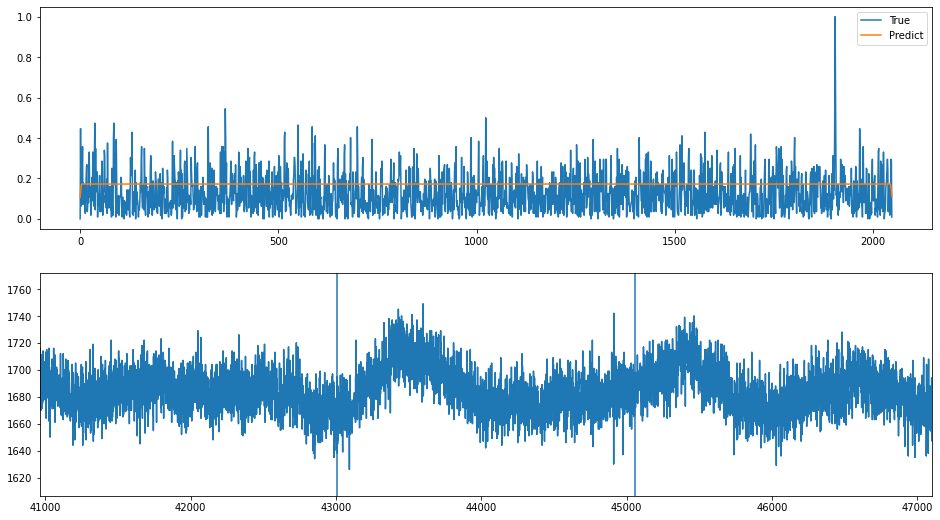

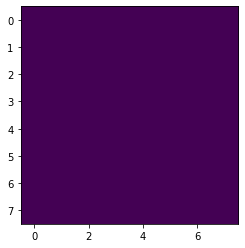

index: 202083
Error: 0.011700142275114447
type                                                         Inst
fill                                                         6919
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-13 11:53:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6919/...
n_bunches                                                    2556
bunch_index                                                  2482
bunch_number                                                 1847
ts_length                                                   65536
chunk                                                          10
Name: 2638, dtype: object


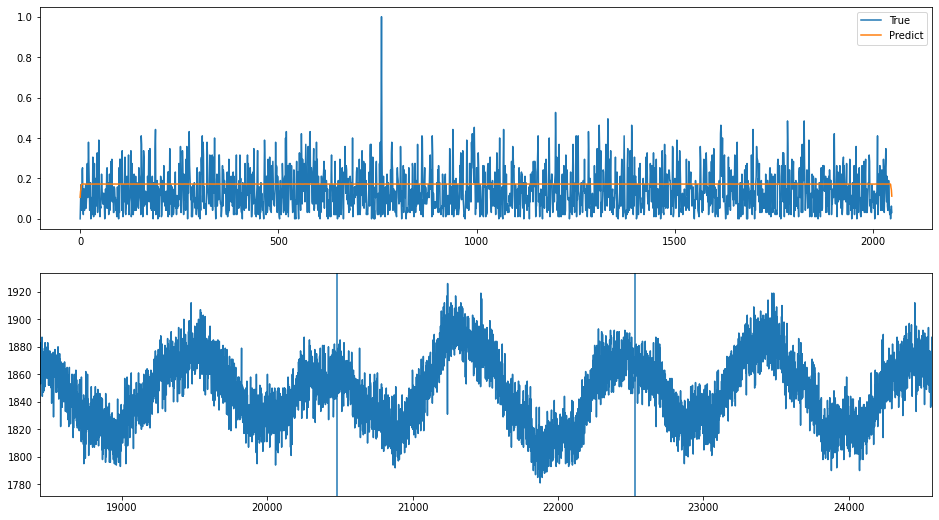

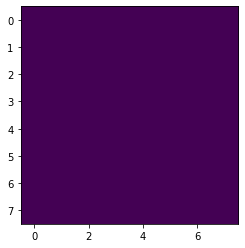

index: 295743
Error: 0.011827041882117681
type                                                         Inst
fill                                                         6775
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-11 16:20:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6775/...
n_bunches                                                     132
bunch_index                                                   165
bunch_number                                                   19
ts_length                                                   65536
chunk                                                           0
Name: 253, dtype: object


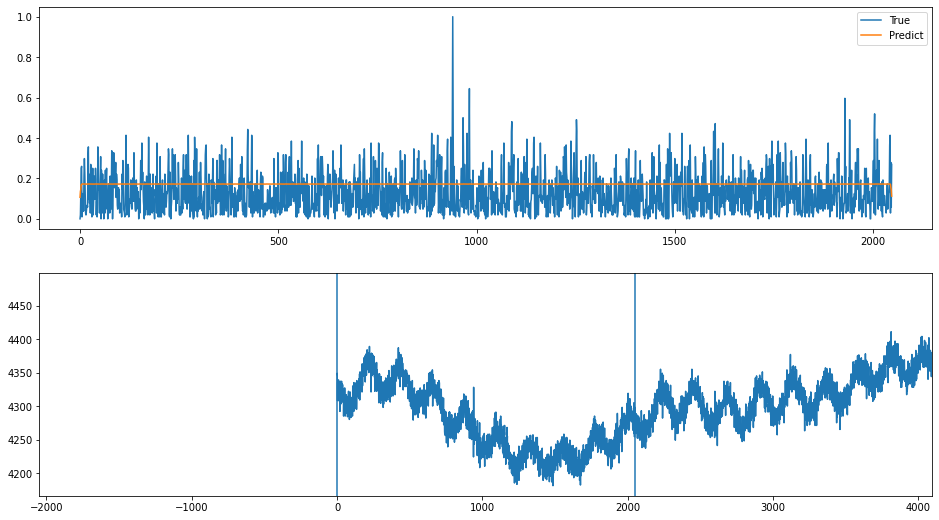

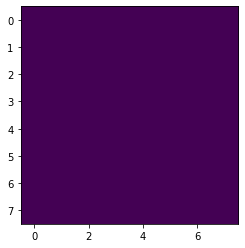

index: 52863
Error: 0.011893081296722278
type                                                         Inst
fill                                                         7234
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-29 02:43:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7234/...
n_bunches                                                     924
bunch_index                                                   502
bunch_number                                                  356
ts_length                                                   65536
chunk                                                          21
Name: 5618, dtype: object


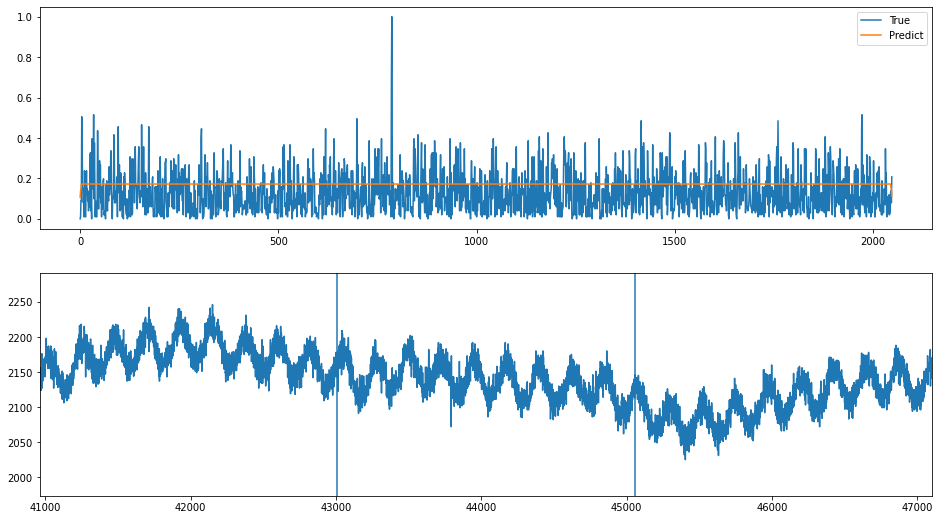

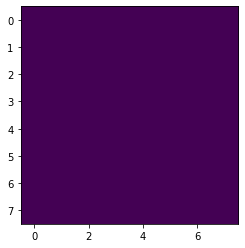

index: 308901
Error: 0.012028836534063777
type                                                         Inst
fill                                                         6279
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-07 10:04:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6279/...
n_bunches                                                    1868
bunch_index                                                  2080
bunch_number                                                 1123
ts_length                                                   65536
chunk                                                           1
Name: 382, dtype: object


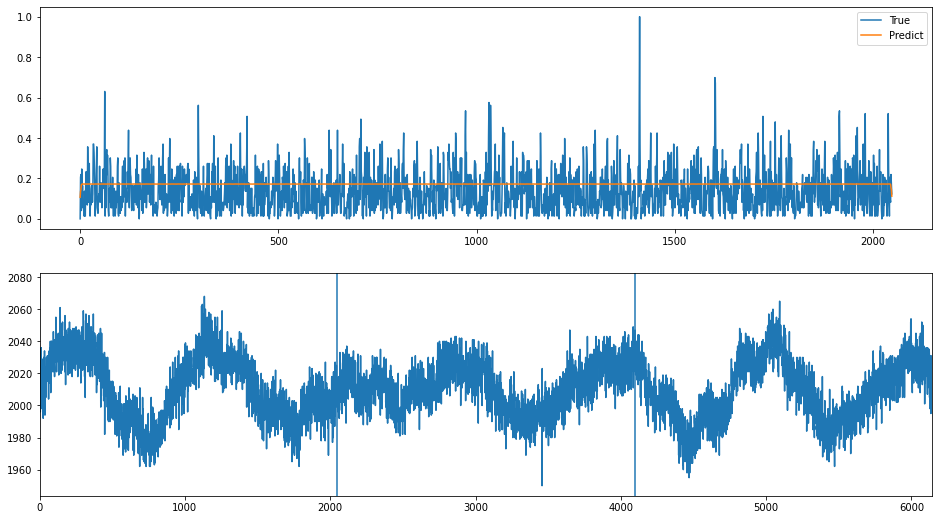

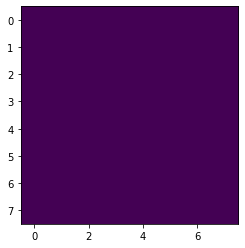

index: 318933
Error: 0.012095090828812393
type                                                         Inst
fill                                                         7109
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-31 19:43:28
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7109/...
n_bunches                                                     636
bunch_index                                                   843
bunch_number                                                  610
ts_length                                                   65536
chunk                                                          10
Name: 2802, dtype: object


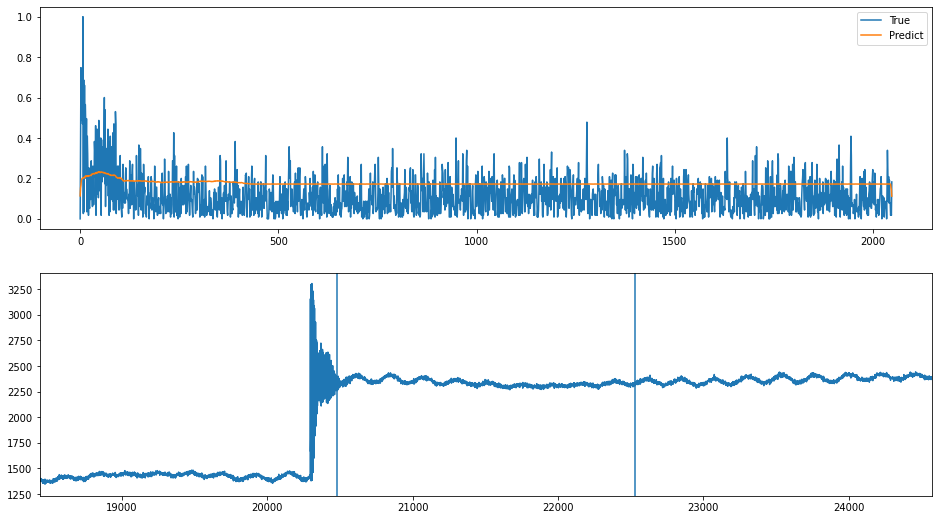

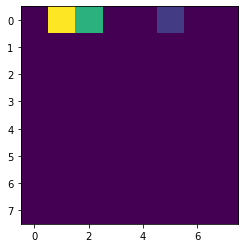

index: 268105
Error: 0.012099513713697465
type                                                         Inst
fill                                                         7314
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-17 23:26:29
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7314/...
n_bunches                                                    1068
bunch_index                                                   205
bunch_number                                                  118
ts_length                                                   65536
chunk                                                          18
Name: 4668, dtype: object


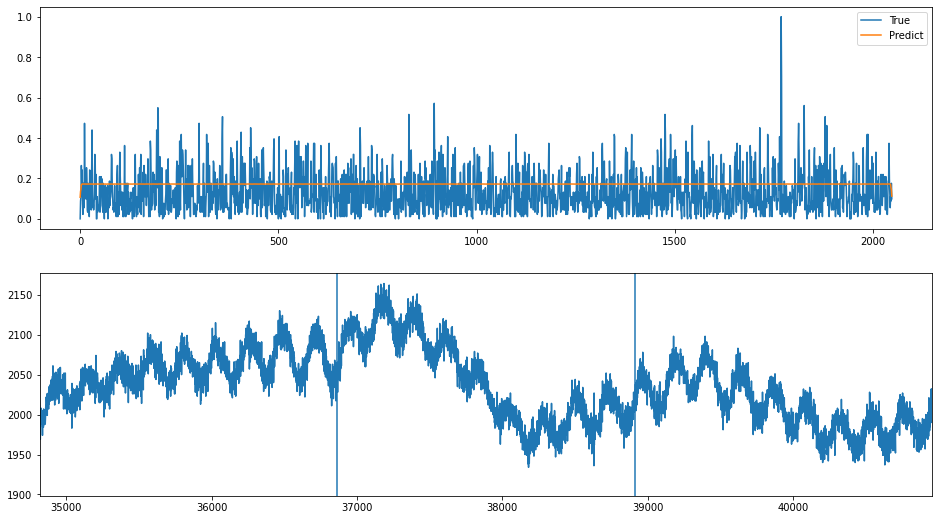

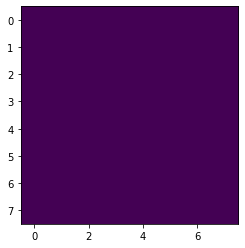

index: 221663
Error: 0.012136443691847396
type                                                         Inst
fill                                                         7137
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-08 02:16:49
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7137/...
n_bunches                                                    1068
bunch_index                                                   258
bunch_number                                                  164
ts_length                                                   65536
chunk                                                          25
Name: 6489, dtype: object


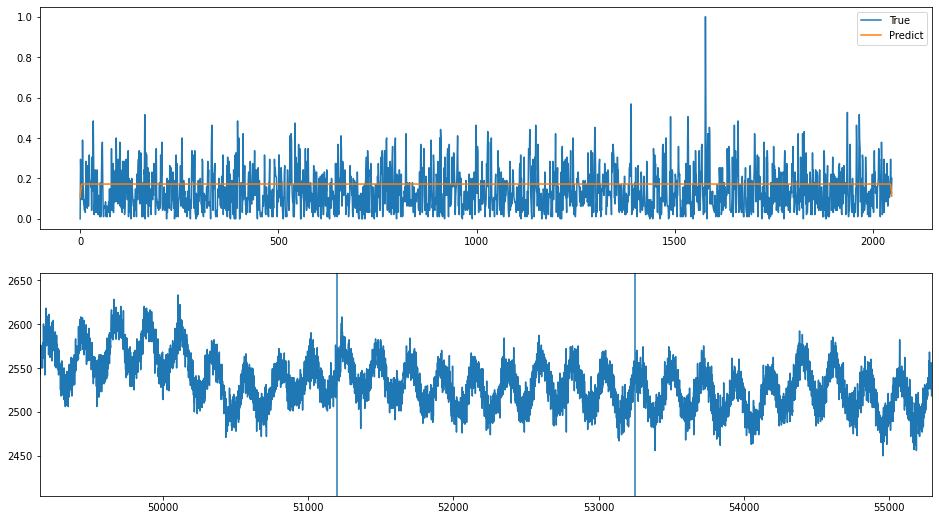

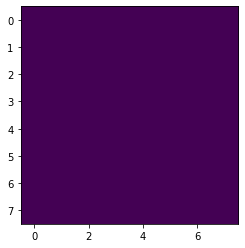

index: 110552
Error: 0.012239588038113182
type                                                         Inst
fill                                                         6892
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-07 04:30:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6892/...
n_bunches                                                    1452
bunch_index                                                   870
bunch_number                                                  358
ts_length                                                   65536
chunk                                                           1
Name: 506, dtype: object


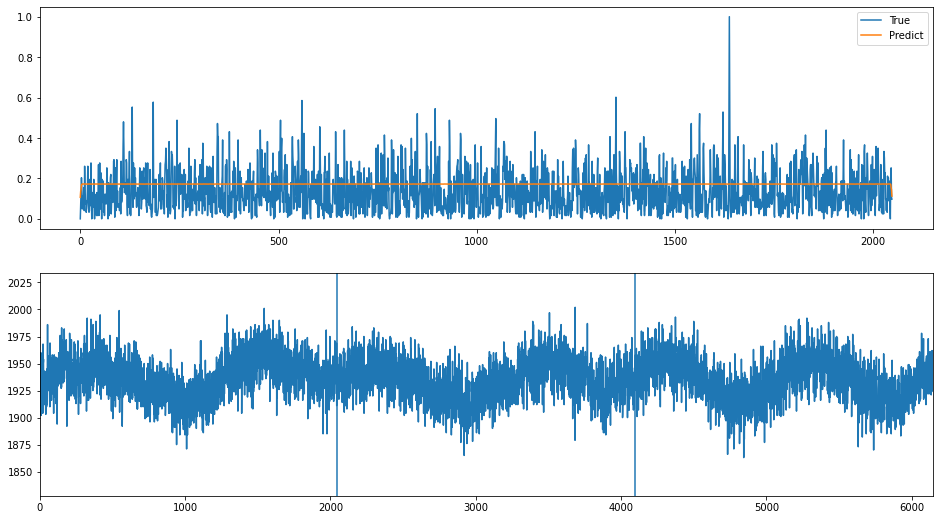

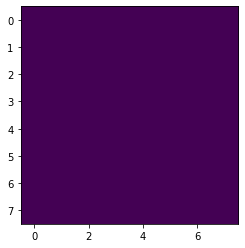

index: 287010
Error: 0.012357655121640252
type                                                         Inst
fill                                                         7110
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-31 21:59:57
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7110/...
n_bunches                                                     636
bunch_index                                                   775
bunch_number                                                  549
ts_length                                                   65536
chunk                                                          11
Name: 3042, dtype: object


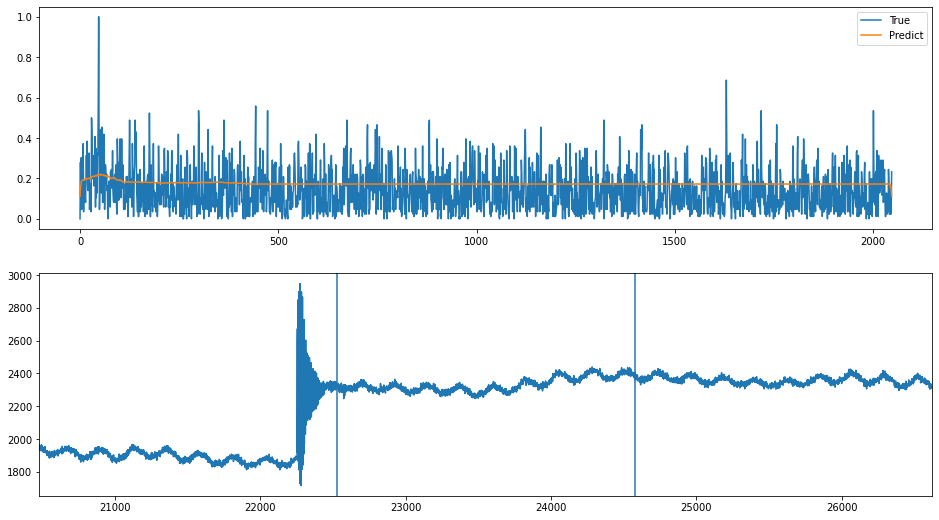

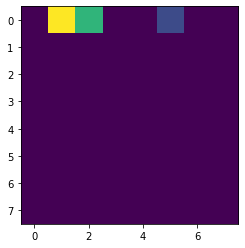

In [25]:
for i in range(10):
    index = sorted_error_indices[i]
    plot_train_index(index)

# From right to left

index: 304432
Error: 0.12241218515281886
type                                                         Inst
fill                                                         7443
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-14 14:58:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7443/...
n_bunches                                                       4
bunch_index                                                    13
bunch_number                                                    1
ts_length                                                   65536
chunk                                                           6
Name: 1663, dtype: object


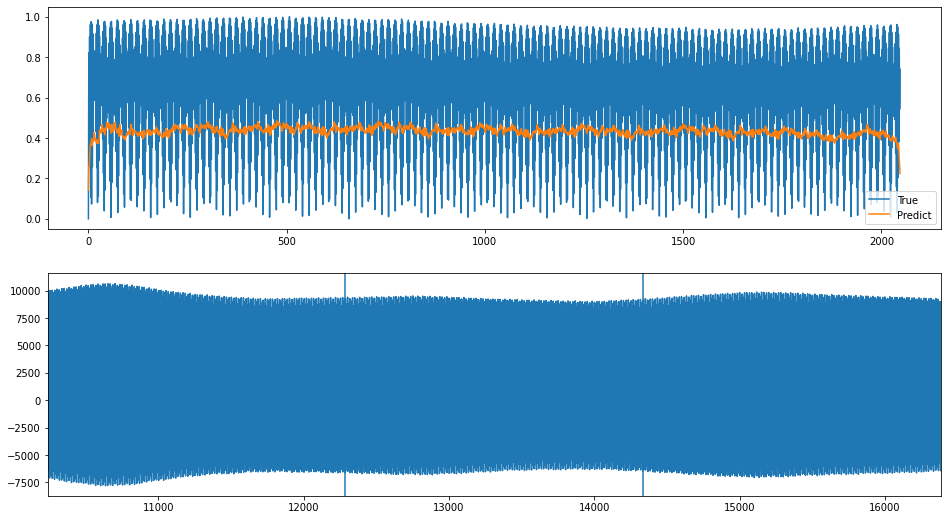

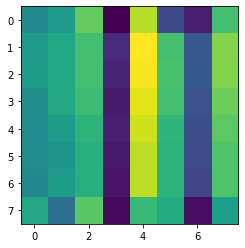

index: 304082
Error: 0.1209231441824663
type                                                         Inst
fill                                                         7443
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-14 14:58:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7443/...
n_bunches                                                       4
bunch_index                                                    13
bunch_number                                                    1
ts_length                                                   65536
chunk                                                           7
Name: 1919, dtype: object


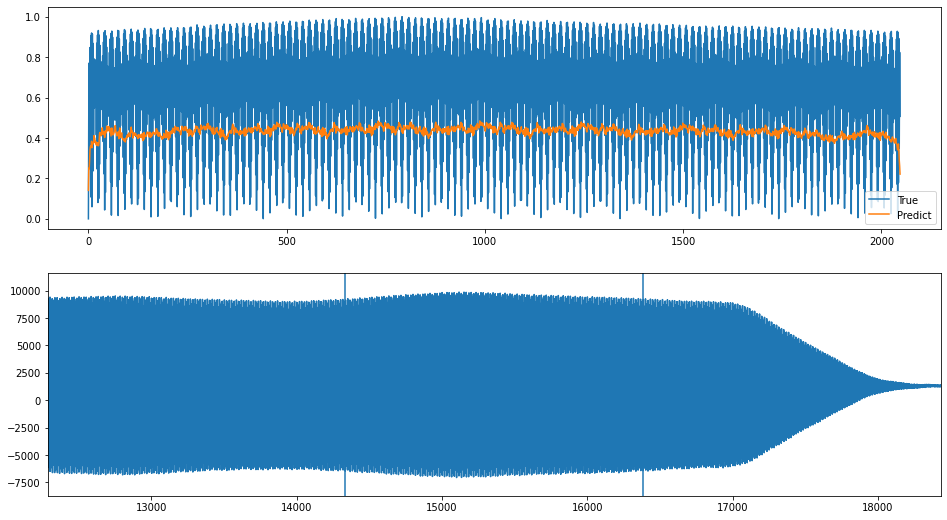

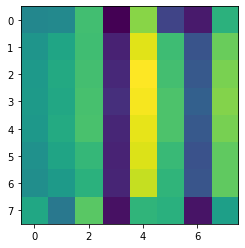

index: 403748
Error: 0.11546542369206558
type                                                         Inst
fill                                                         6534
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-10 04:32:35
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6534/...
n_bunches                                                       1
bunch_index                                                    14
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          14
Name: 3607, dtype: object


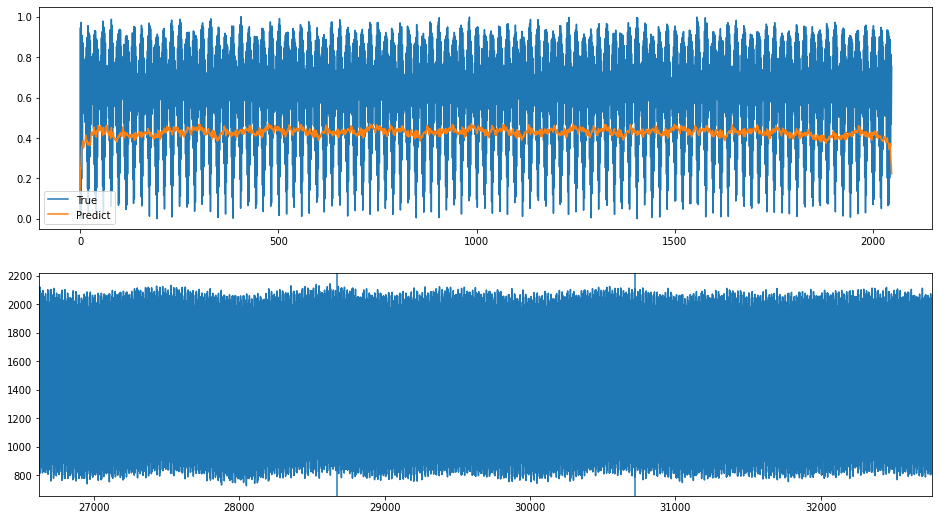

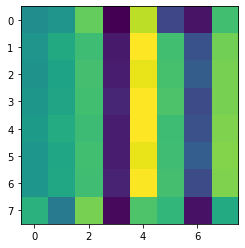

index: 404691
Error: 0.11420600096372516
type                                                         Inst
fill                                                         6534
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-10 04:32:35
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6534/...
n_bunches                                                       1
bunch_index                                                    14
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          13
Name: 3351, dtype: object


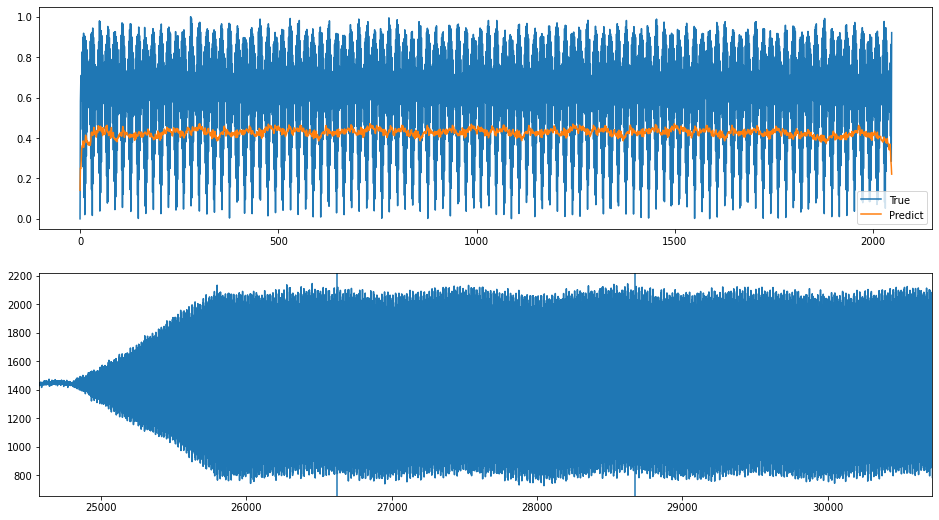

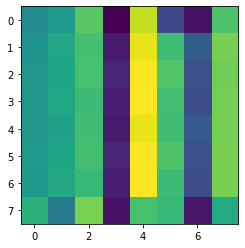

index: 401859
Error: 0.11187951617413404
type                                                         Inst
fill                                                         6534
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-10 04:32:35
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6534/...
n_bunches                                                       1
bunch_index                                                    14
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          15
Name: 3863, dtype: object


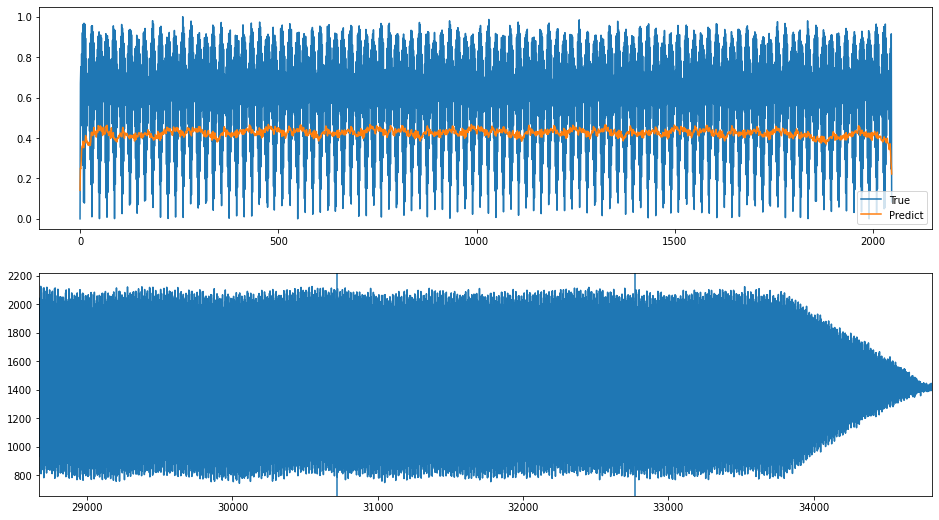

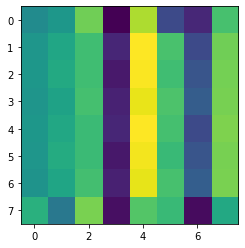

index: 309232
Error: 0.10508107164279
type                                                         Inst
fill                                                         7443
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-14 14:58:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7443/...
n_bunches                                                       4
bunch_index                                                    13
bunch_number                                                    1
ts_length                                                   65536
chunk                                                           5
Name: 1407, dtype: object


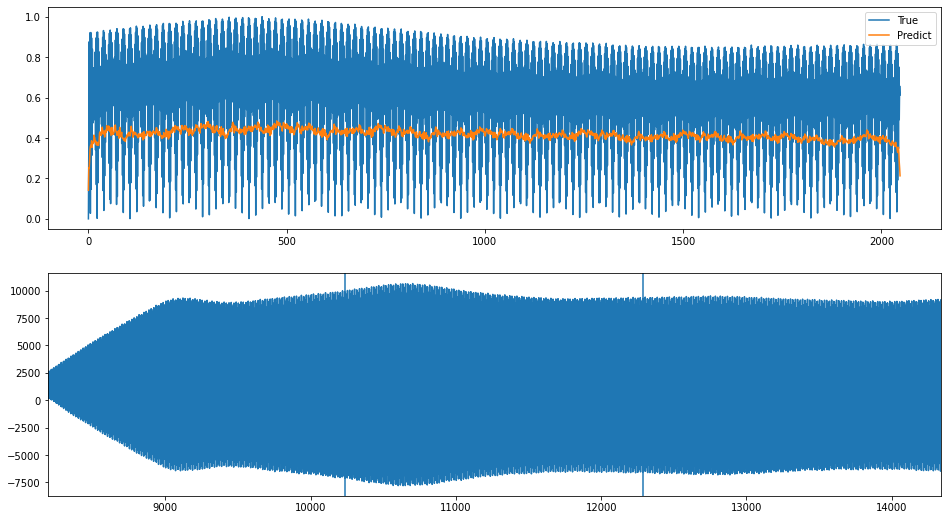

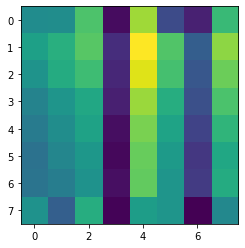

index: 274191
Error: 0.09803514249918699
type                                                         Inst
fill                                                         6596
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-23 09:04:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6596/...
n_bunches                                                     228
bunch_index                                                   157
bunch_number                                                  109
ts_length                                                   65536
chunk                                                           5
Name: 1464, dtype: object


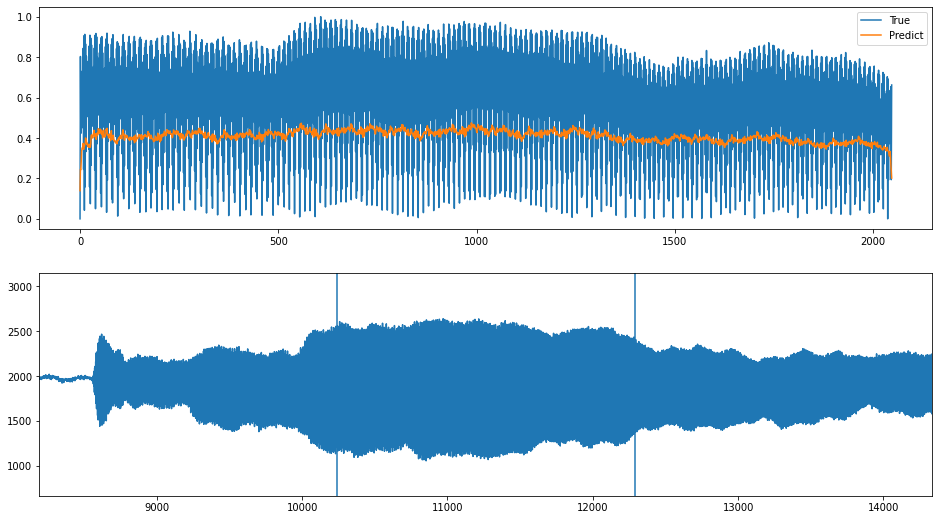

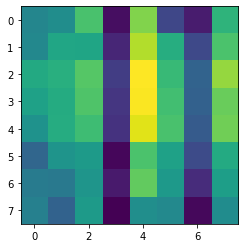

index: 388608
Error: 0.0970270513386216
type                                                         Inst
fill                                                         6860
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-28 17:35:35
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6860/...
n_bunches                                                    2460
bunch_index                                                    34
bunch_number                                                   10
ts_length                                                   65536
chunk                                                          14
Name: 3694, dtype: object


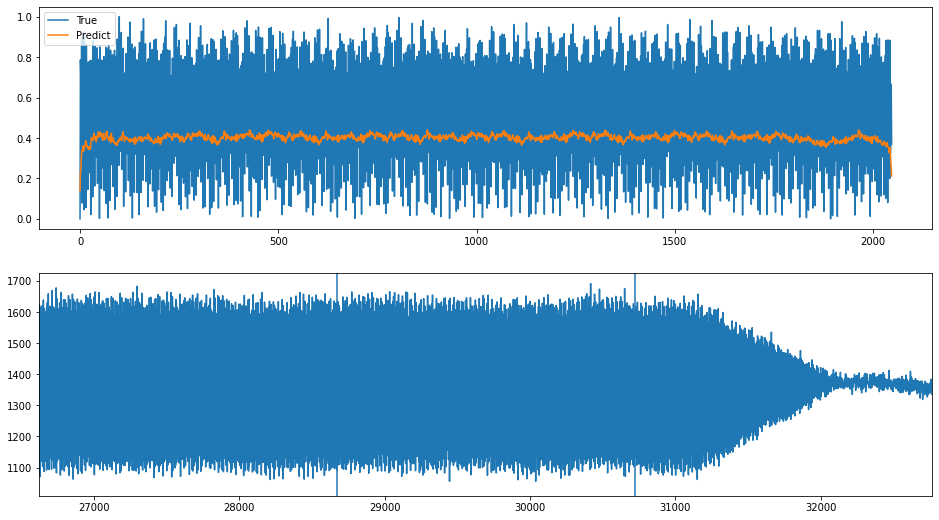

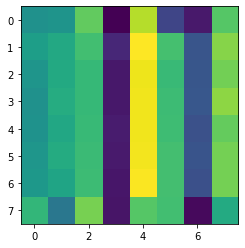

index: 389849
Error: 0.09570638386999607
type                                                         Inst
fill                                                         6860
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-28 17:35:35
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6860/...
n_bunches                                                    2460
bunch_index                                                    34
bunch_number                                                   10
ts_length                                                   65536
chunk                                                          12
Name: 3182, dtype: object


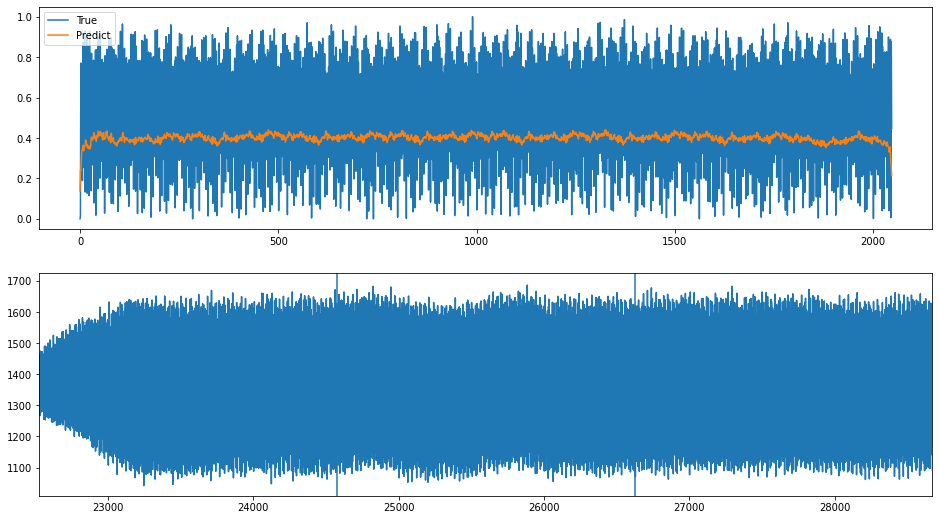

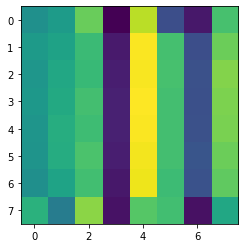

index: 403155
Error: 0.0954570489688682
type                                                         Inst
fill                                                         6597
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-23 10:17:26
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6597/...
n_bunches                                                     228
bunch_index                                                   148
bunch_number                                                  104
ts_length                                                   65536
chunk                                                          14
Name: 3627, dtype: object


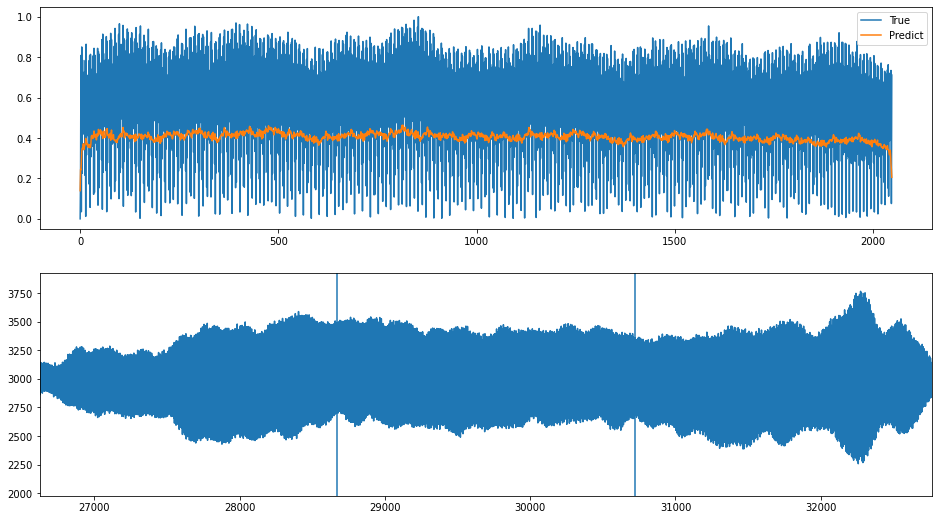

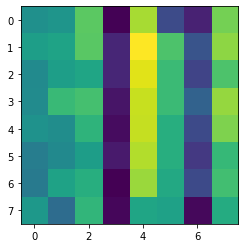

index: 250594
Error: 0.09409306432800821
type                                                         Inst
fill                                                         6438
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-30 18:02:29
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6438/...
n_bunches                                                       2
bunch_index                                                  2085
bunch_number                                                    1
ts_length                                                   65536
chunk                                                          16
Name: 4146, dtype: object


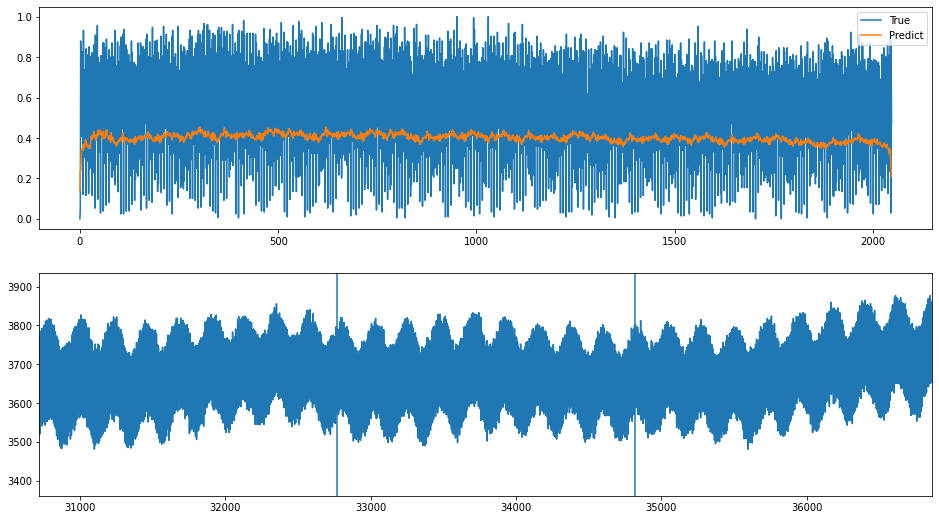

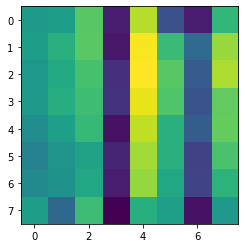

index: 393125
Error: 0.09351727330217358
type                                                         Inst
fill                                                         6860
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-28 17:35:35
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6860/...
n_bunches                                                    2460
bunch_index                                                    34
bunch_number                                                   10
ts_length                                                   65536
chunk                                                          13
Name: 3438, dtype: object


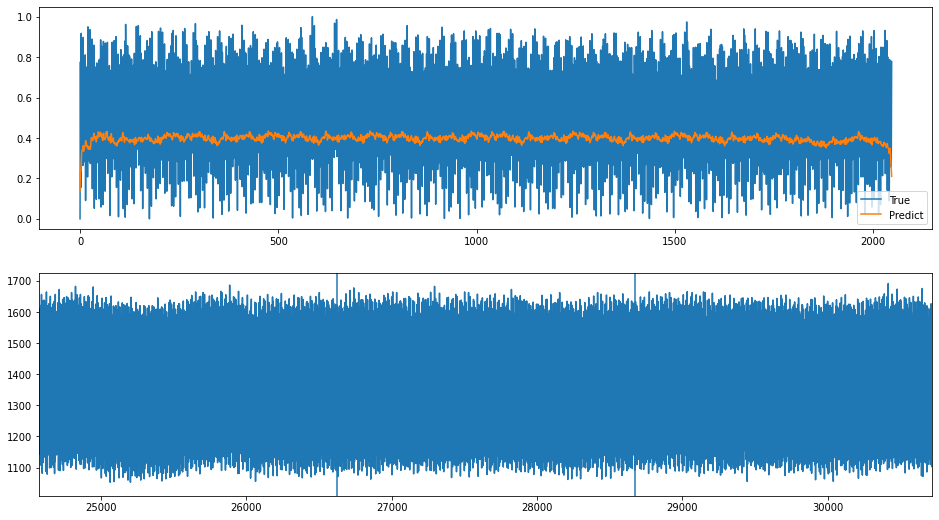

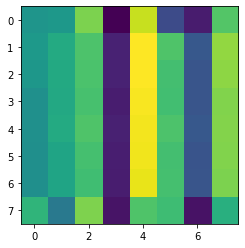

index: 292684
Error: 0.09261119932034698
type                                                         Inst
fill                                                         6919
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-13 05:38:25
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6919/...
n_bunches                                                     252
bunch_index                                                   161
bunch_number                                                  105
ts_length                                                   65536
chunk                                                          12
Name: 3283, dtype: object


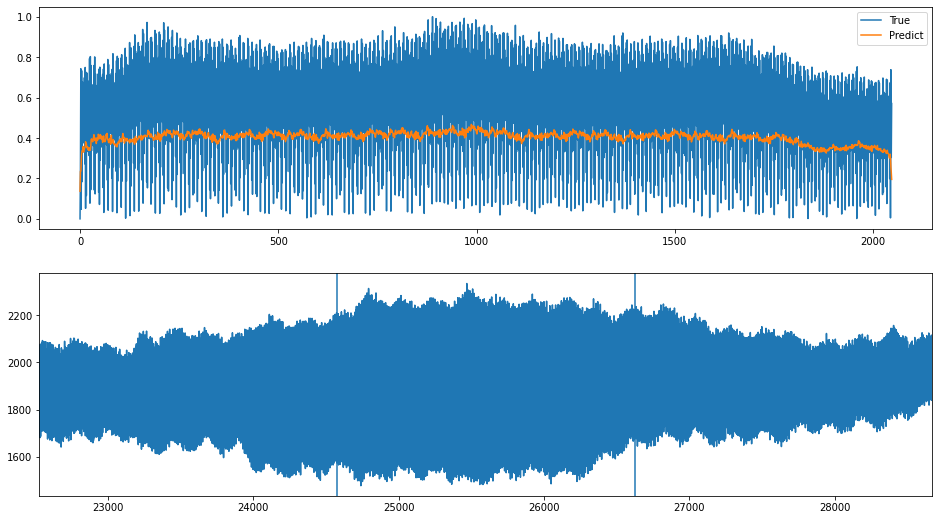

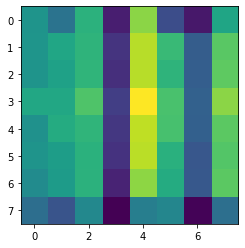

index: 179292
Error: 0.09184652111658666
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:17:44
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1534
bunch_number                                                   78
ts_length                                                   65536
chunk                                                          15
Name: 4067, dtype: object


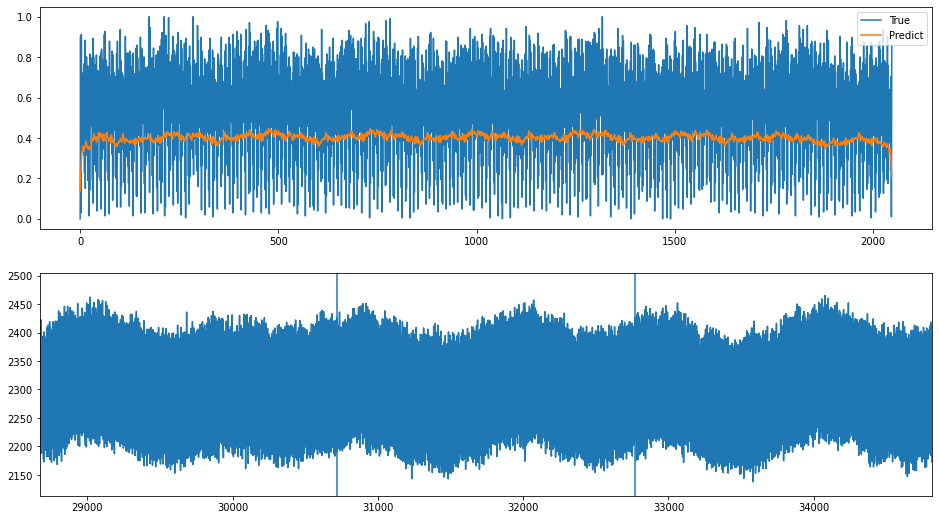

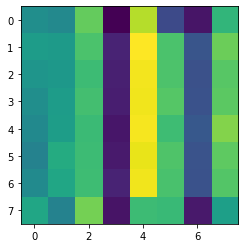

index: 290729
Error: 0.09183557108582235
type                                                         Inst
fill                                                         6919
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-13 05:38:25
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6919/...
n_bunches                                                     252
bunch_index                                                   161
bunch_number                                                  105
ts_length                                                   65536
chunk                                                          23
Name: 6099, dtype: object


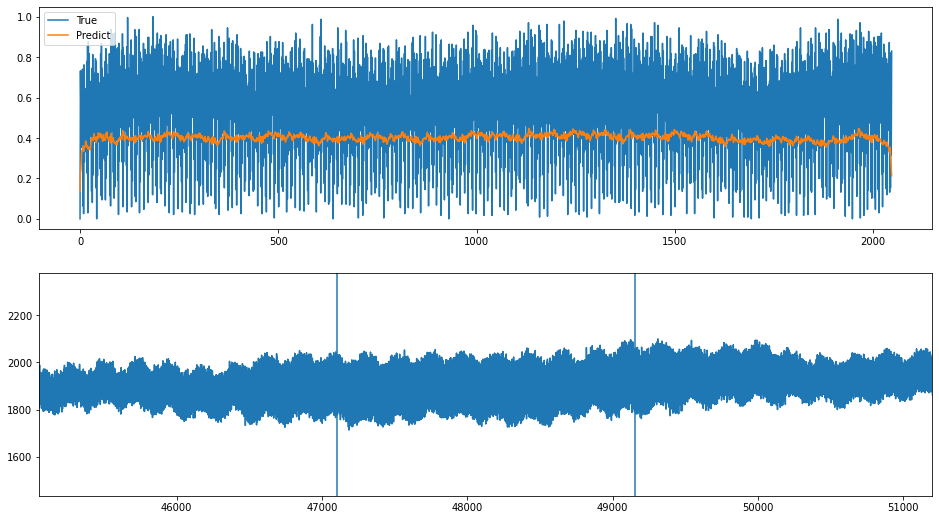

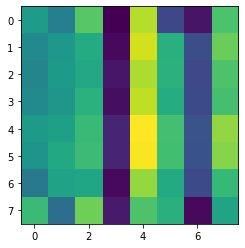

index: 176855
Error: 0.0917420591598887
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:17:44
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1534
bunch_number                                                   78
ts_length                                                   65536
chunk                                                          20
Name: 5347, dtype: object


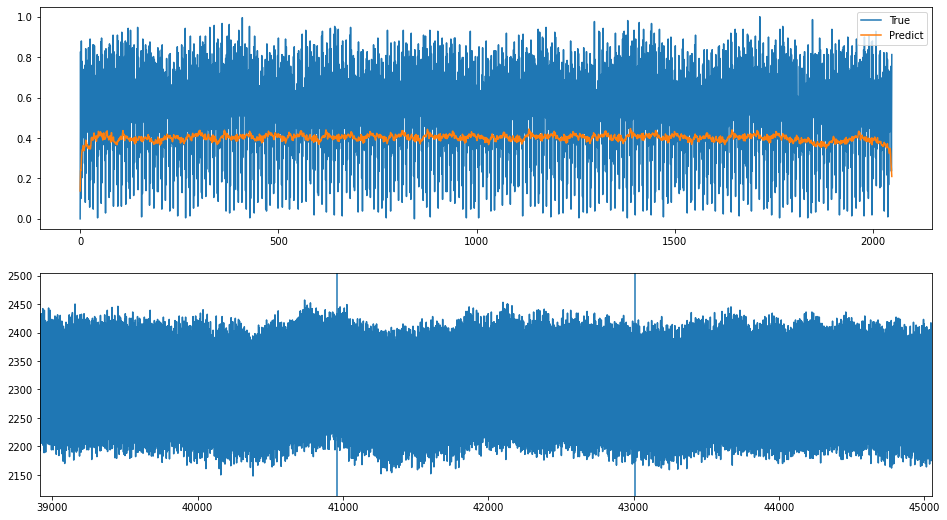

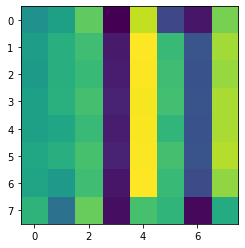

index: 253308
Error: 0.09151976325603543
type                                                         Inst
fill                                                         6438
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-30 18:02:29
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6438/...
n_bunches                                                       2
bunch_index                                                  2085
bunch_number                                                    1
ts_length                                                   65536
chunk                                                          18
Name: 4658, dtype: object


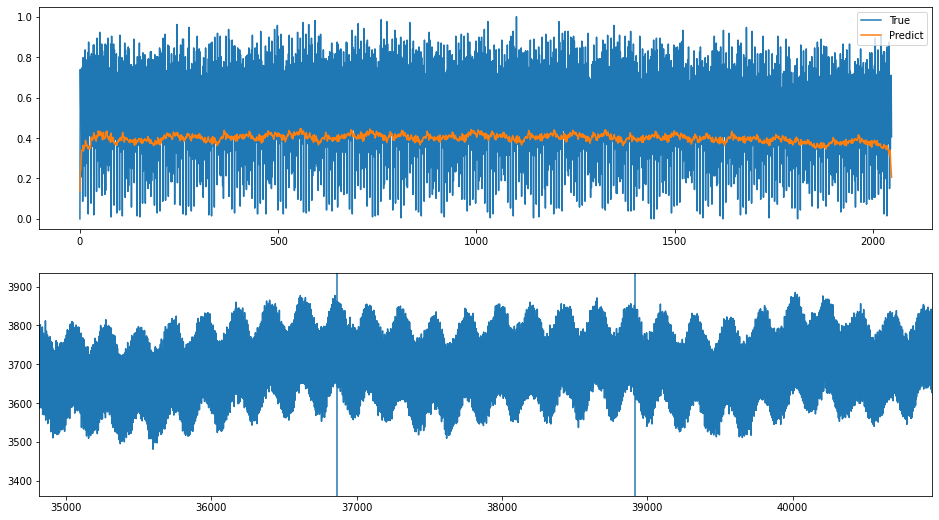

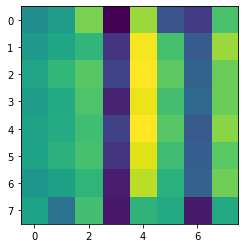

index: 217281
Error: 0.09123846377883787
type                                                         Inst
fill                                                         6452
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-03 03:01:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6452/...
n_bunches                                                     129
bunch_index                                                  2506
bunch_number                                                  103
ts_length                                                   65536
chunk                                                          29
Name: 7609, dtype: object


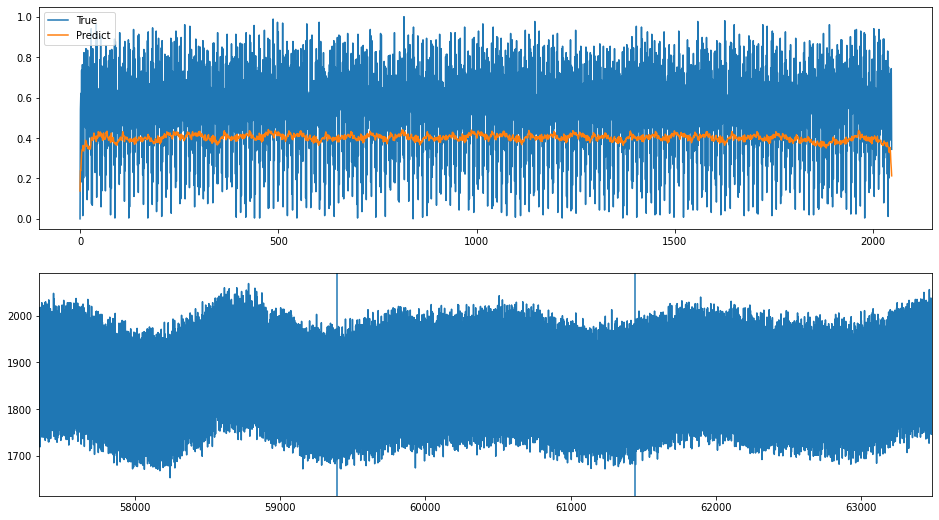

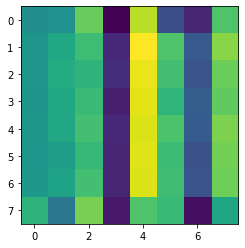

index: 252633
Error: 0.0908999839929996
type                                                         Inst
fill                                                         6438
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-30 18:02:29
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6438/...
n_bunches                                                       2
bunch_index                                                  2085
bunch_number                                                    1
ts_length                                                   65536
chunk                                                          26
Name: 6706, dtype: object


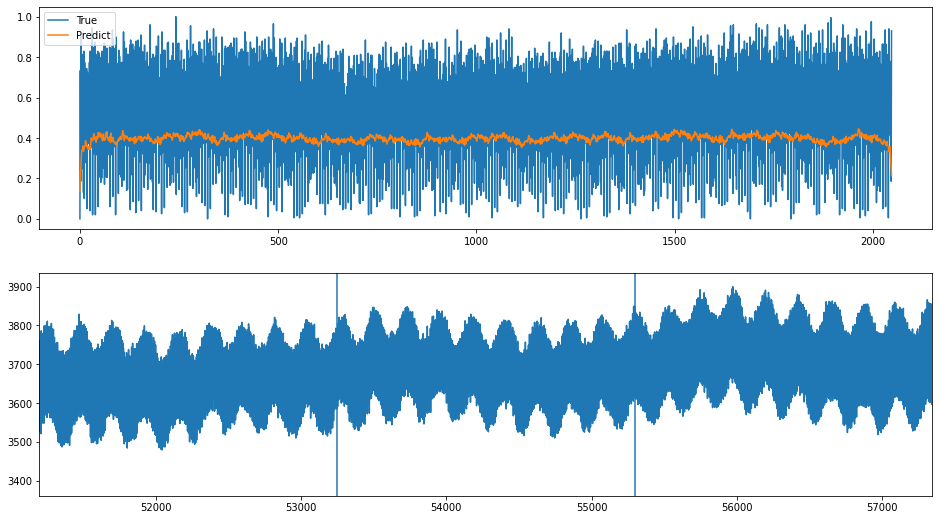

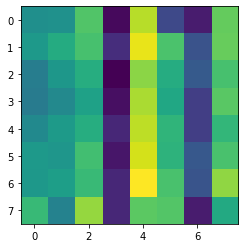

index: 176337
Error: 0.09082693088030971
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:17:44
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1534
bunch_number                                                   78
ts_length                                                   65536
chunk                                                           8
Name: 2275, dtype: object


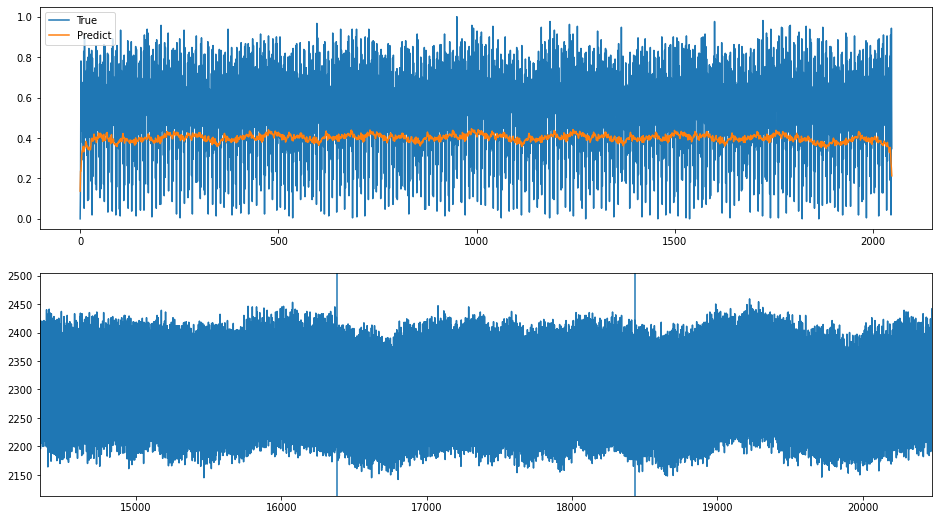

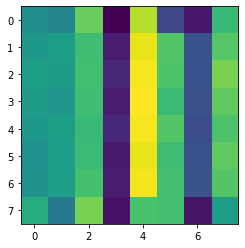

index: 175168
Error: 0.09053736973827153
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:17:44
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1534
bunch_number                                                   78
ts_length                                                   65536
chunk                                                          22
Name: 5859, dtype: object


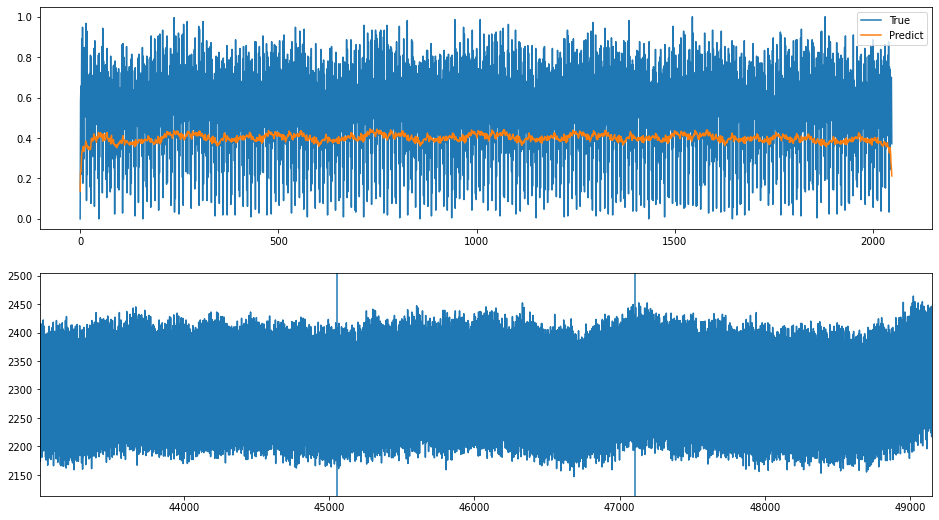

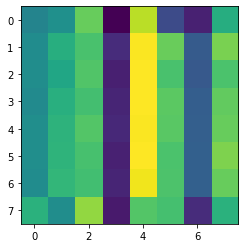

index: 340458
Error: 0.09041502318544717
type                                                         Inst
fill                                                         6662
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-09 21:37:26
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6662/...
n_bunches                                                     252
bunch_index                                                   167
bunch_number                                                   92
ts_length                                                   65536
chunk                                                           8
Name: 2115, dtype: object


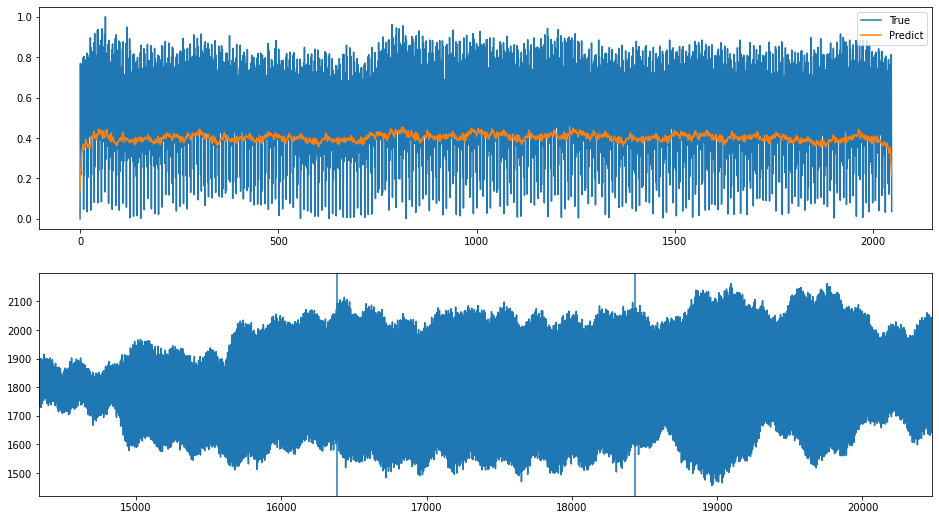

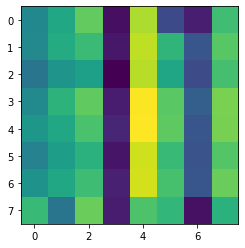

index: 179237
Error: 0.09030221601601218
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:17:44
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1534
bunch_number                                                   78
ts_length                                                   65536
chunk                                                          17
Name: 4579, dtype: object


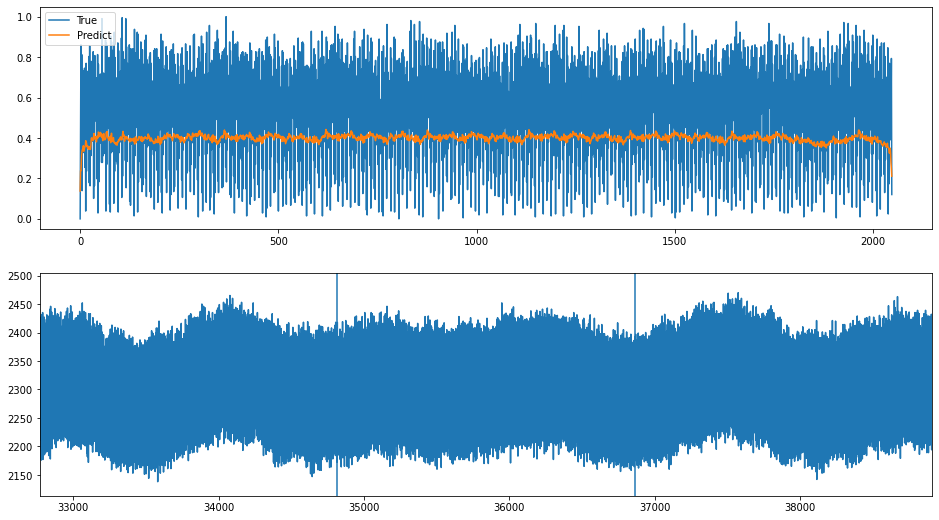

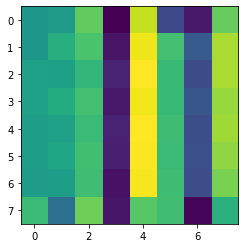

index: 247920
Error: 0.09013427047954897
type                                                         Inst
fill                                                         6438
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-30 18:02:29
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6438/...
n_bunches                                                       2
bunch_index                                                  2085
bunch_number                                                    1
ts_length                                                   65536
chunk                                                          11
Name: 2866, dtype: object


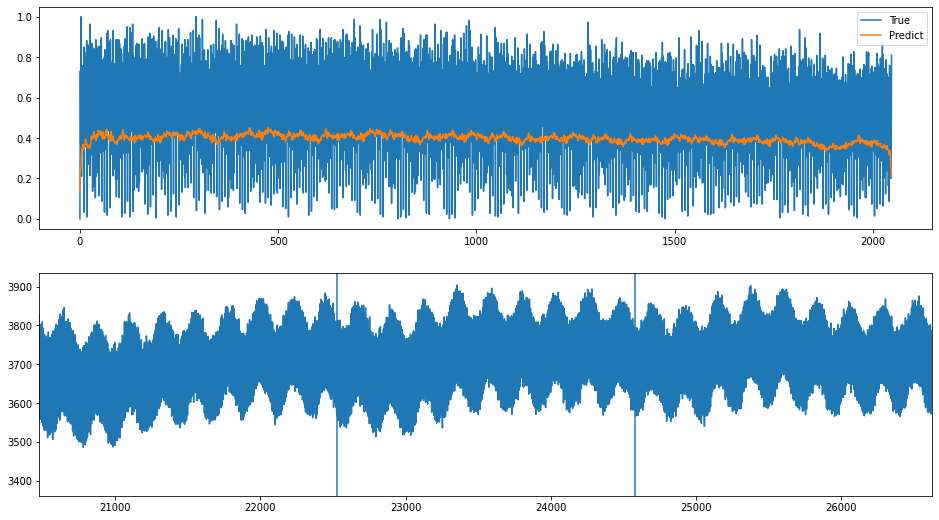

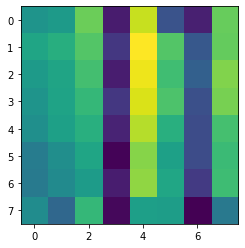

index: 253764
Error: 0.08947871415488959
type                                                         Inst
fill                                                         6438
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-30 18:02:29
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6438/...
n_bunches                                                       2
bunch_index                                                  2085
bunch_number                                                    1
ts_length                                                   65536
chunk                                                          21
Name: 5426, dtype: object


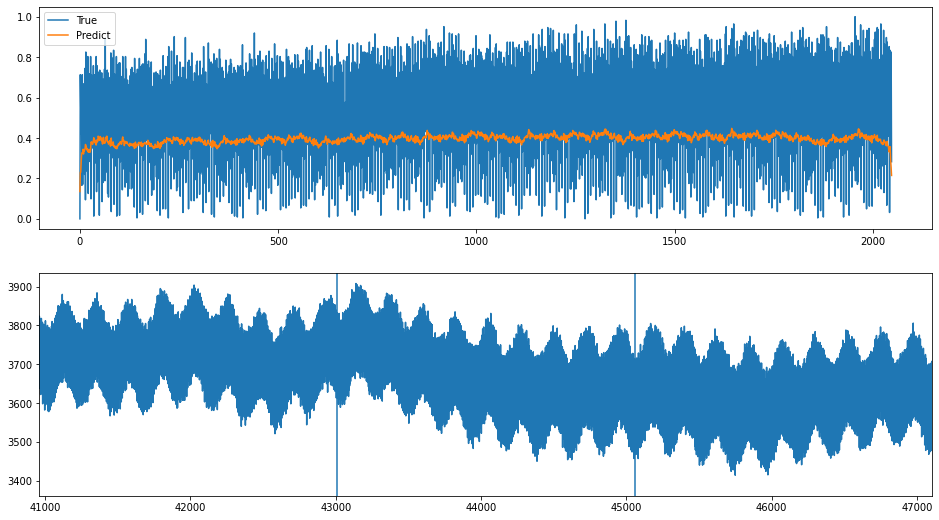

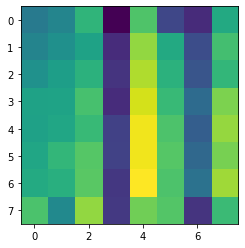

index: 98688
Error: 0.0892702657709076
type                                                         Inst
fill                                                         7024
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-05 07:38:23
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7024/...
n_bunches                                                     252
bunch_index                                                   100
bunch_number                                                   51
ts_length                                                   65536
chunk                                                           8
Name: 2130, dtype: object


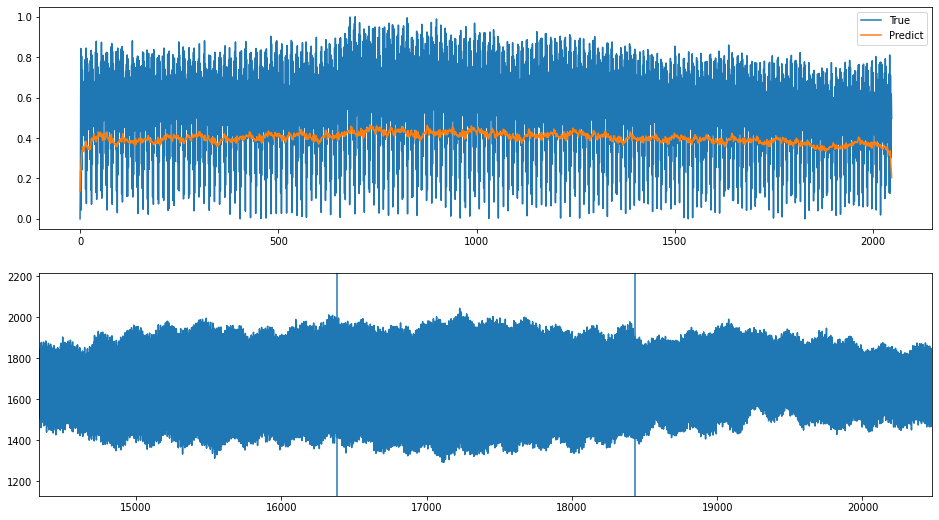

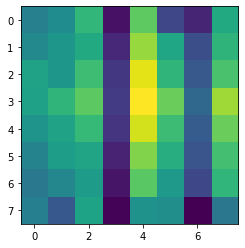

index: 180187
Error: 0.08923673699319976
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:17:44
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1534
bunch_number                                                   78
ts_length                                                   65536
chunk                                                           3
Name: 995, dtype: object


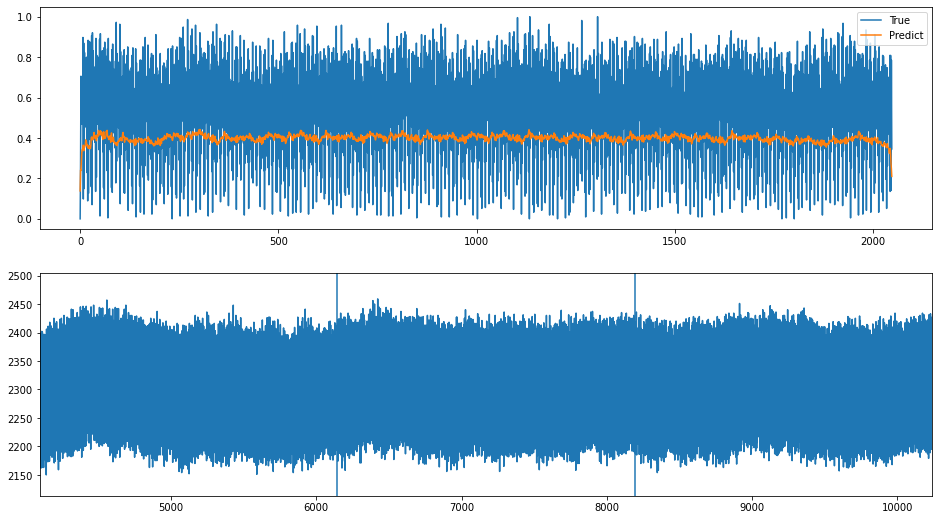

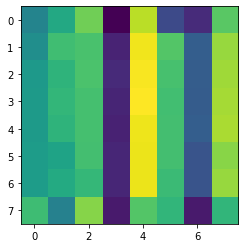

index: 104033
Error: 0.08917909569459975
type                                                         Inst
fill                                                         7024
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-05 07:38:23
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7024/...
n_bunches                                                     252
bunch_index                                                   100
bunch_number                                                   51
ts_length                                                   65536
chunk                                                          13
Name: 3410, dtype: object


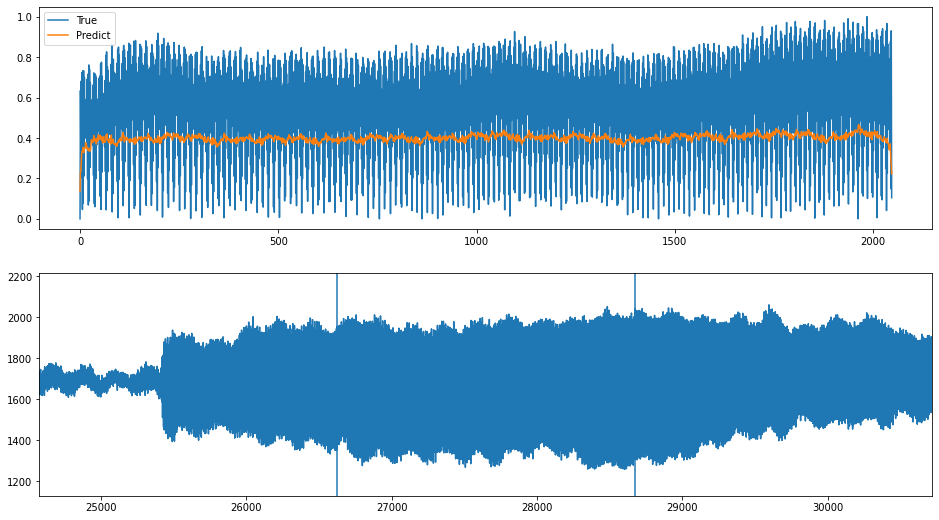

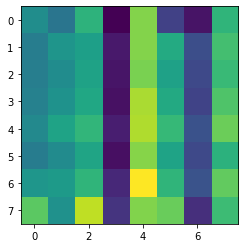

index: 174638
Error: 0.08908431841016601
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:17:44
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1534
bunch_number                                                   78
ts_length                                                   65536
chunk                                                           0
Name: 227, dtype: object


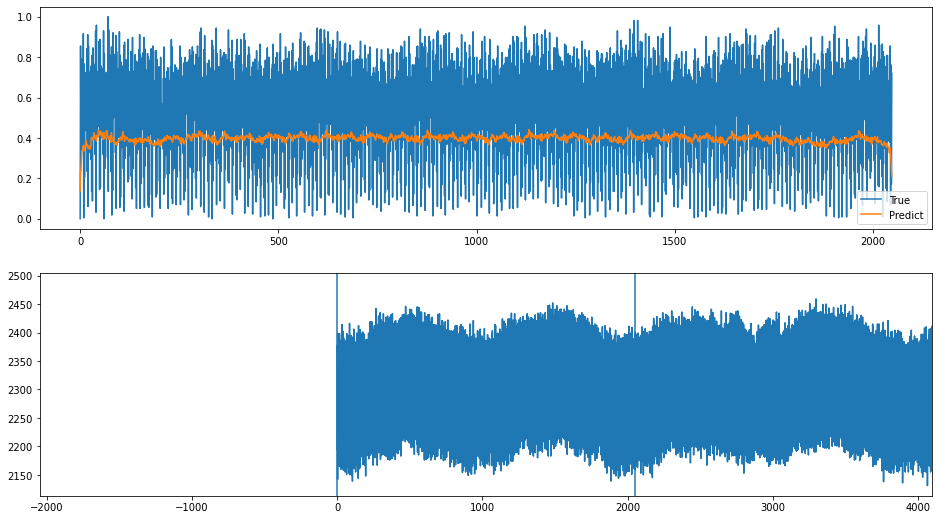

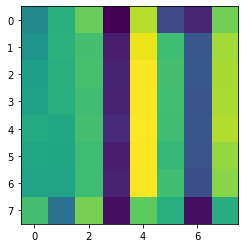

index: 174074
Error: 0.08899121786758209
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:17:44
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1534
bunch_number                                                   78
ts_length                                                   65536
chunk                                                          25
Name: 6627, dtype: object


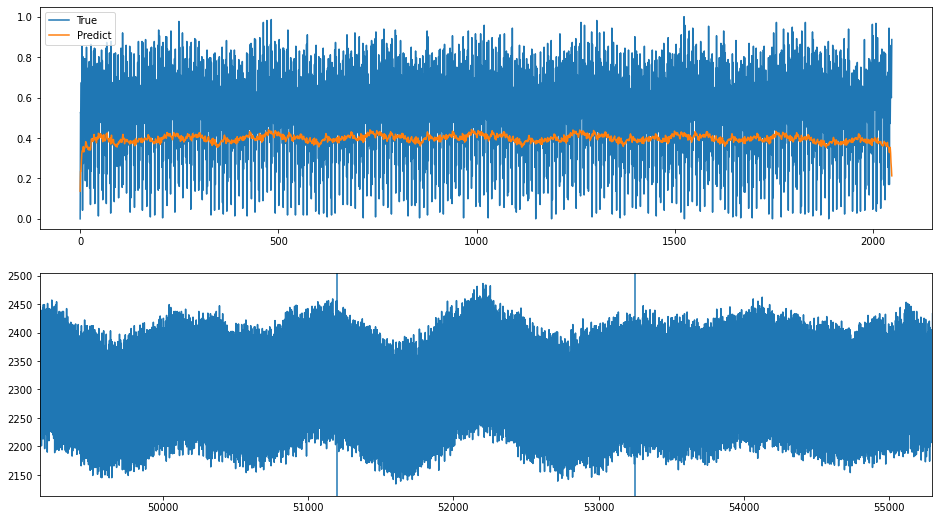

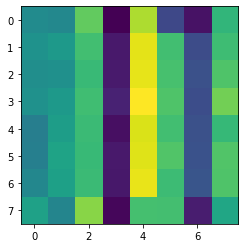

index: 217660
Error: 0.08890239197103086
type                                                         Inst
fill                                                         6452
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-03 03:01:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6452/...
n_bunches                                                     129
bunch_index                                                  2506
bunch_number                                                  103
ts_length                                                   65536
chunk                                                           8
Name: 2233, dtype: object


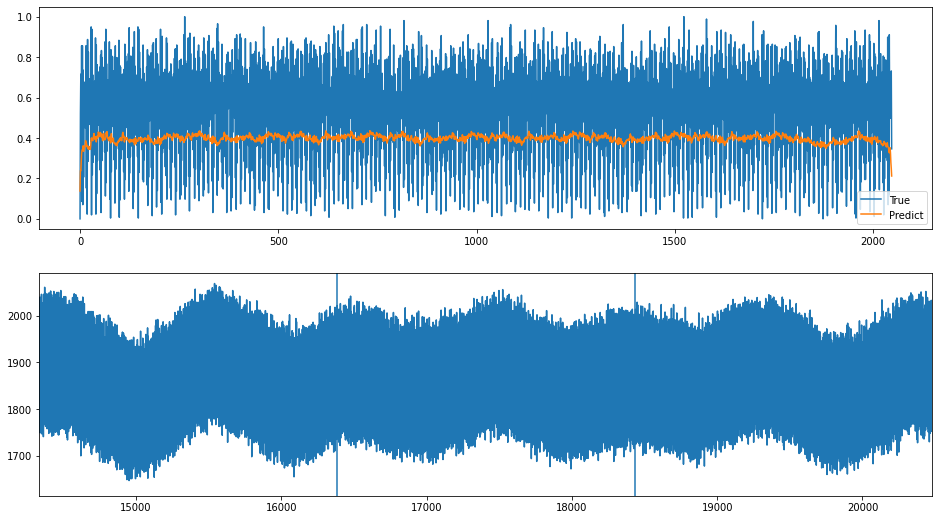

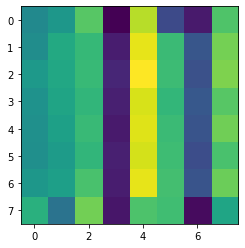

index: 103442
Error: 0.08886543751573608
type                                                         Inst
fill                                                         7024
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-05 07:38:23
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7024/...
n_bunches                                                     252
bunch_index                                                   100
bunch_number                                                   51
ts_length                                                   65536
chunk                                                           7
Name: 1874, dtype: object


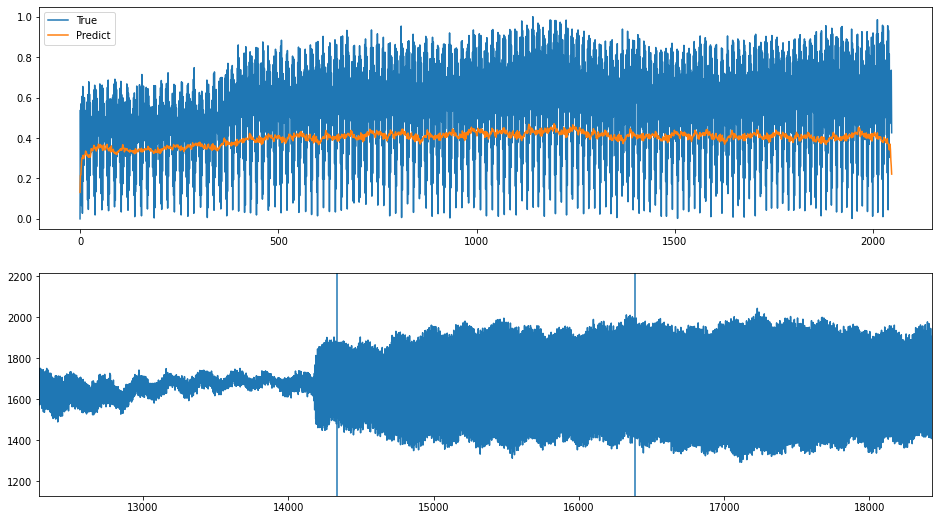

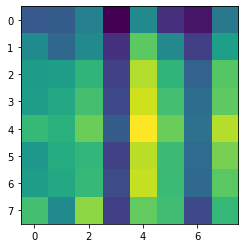

index: 252653
Error: 0.08885322436626295
type                                                         Inst
fill                                                         6438
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-30 18:02:29
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6438/...
n_bunches                                                       2
bunch_index                                                  2085
bunch_number                                                    1
ts_length                                                   65536
chunk                                                          17
Name: 4402, dtype: object


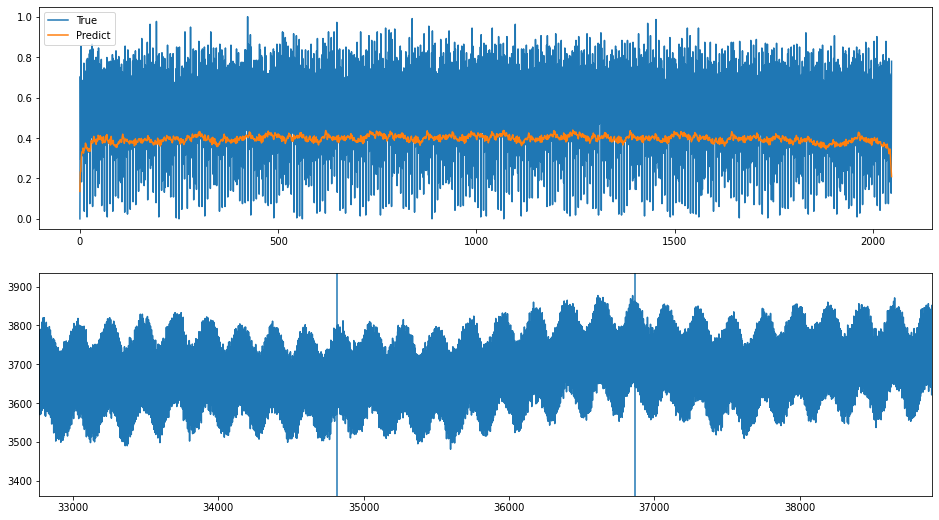

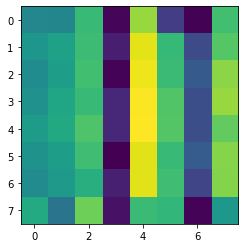

index: 174710
Error: 0.08864960298184973
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:17:44
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1534
bunch_number                                                   78
ts_length                                                   65536
chunk                                                           9
Name: 2531, dtype: object


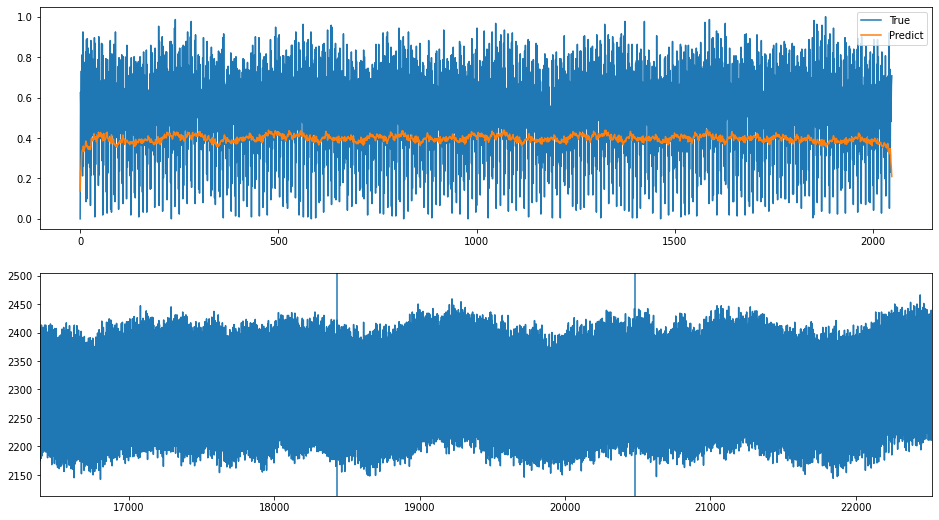

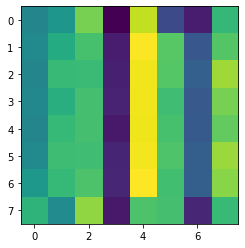

index: 249548
Error: 0.08827050007477213
type                                                         Inst
fill                                                         6438
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-30 18:02:29
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6438/...
n_bunches                                                       2
bunch_index                                                  2085
bunch_number                                                    1
ts_length                                                   65536
chunk                                                          19
Name: 4914, dtype: object


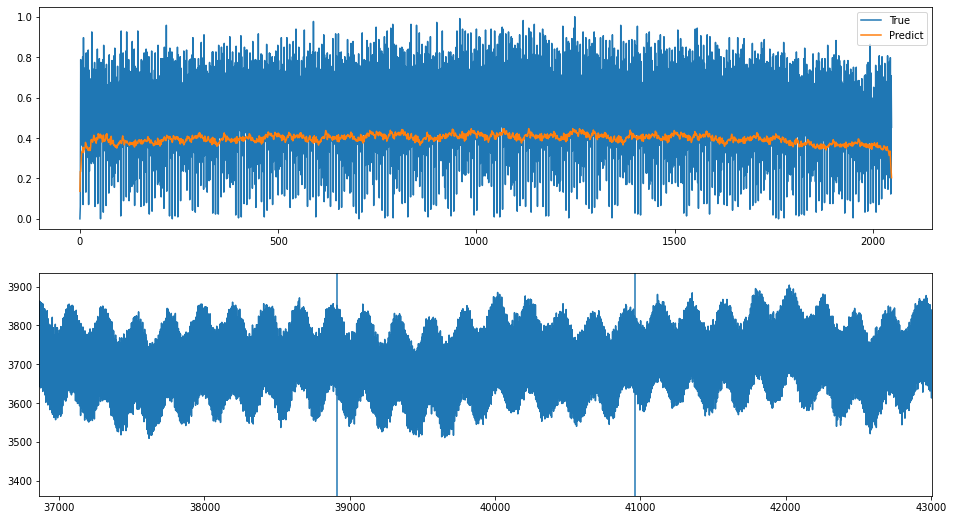

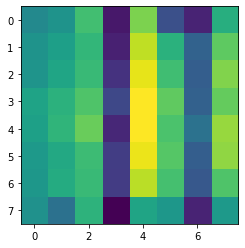

index: 177307
Error: 0.08816782426023934
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:17:44
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1534
bunch_number                                                   78
ts_length                                                   65536
chunk                                                          24
Name: 6371, dtype: object


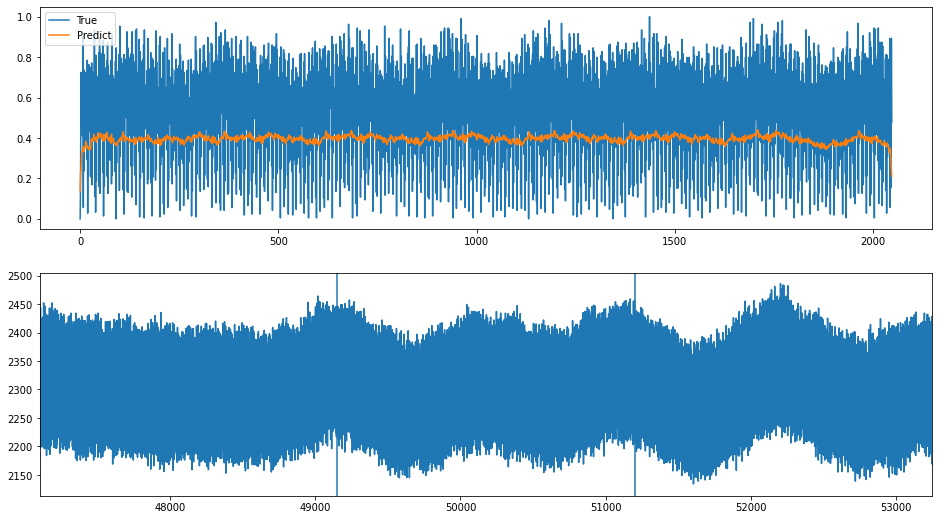

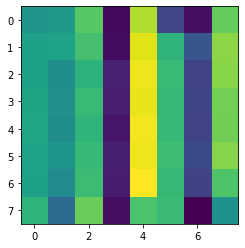

index: 213902
Error: 0.08780364031586915
type                                                         Inst
fill                                                         6452
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-03 03:01:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6452/...
n_bunches                                                     129
bunch_index                                                  2506
bunch_number                                                  103
ts_length                                                   65536
chunk                                                          25
Name: 6585, dtype: object


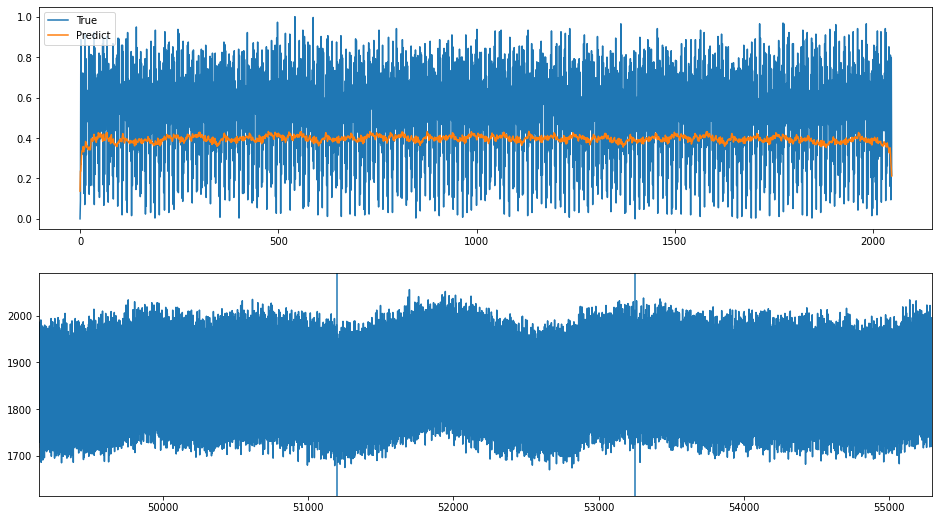

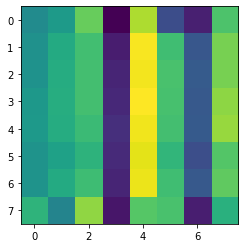

index: 179075
Error: 0.08751638804256137
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:17:44
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1534
bunch_number                                                   78
ts_length                                                   65536
chunk                                                          23
Name: 6115, dtype: object


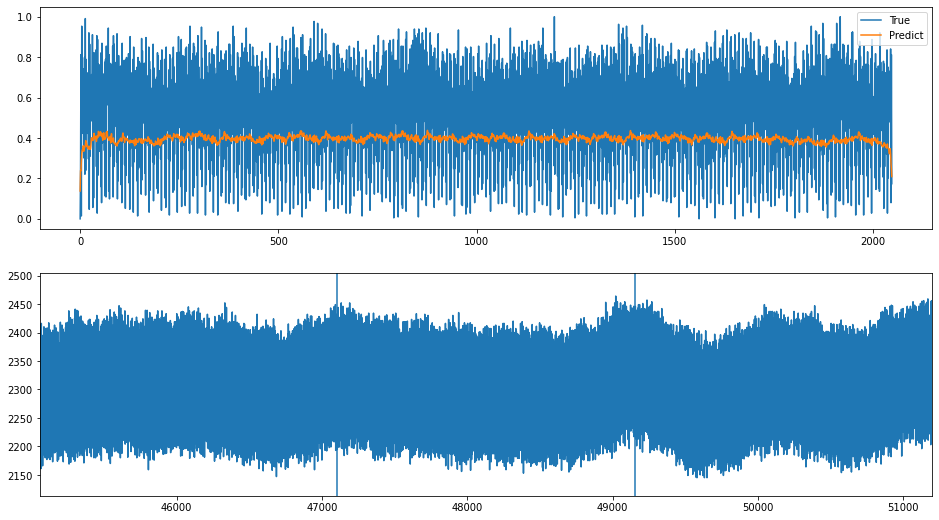

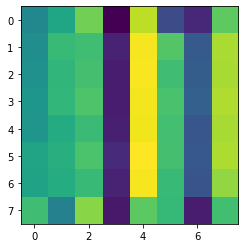

index: 175635
Error: 0.08750398340091523
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:17:44
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1534
bunch_number                                                   78
ts_length                                                   65536
chunk                                                          21
Name: 5603, dtype: object


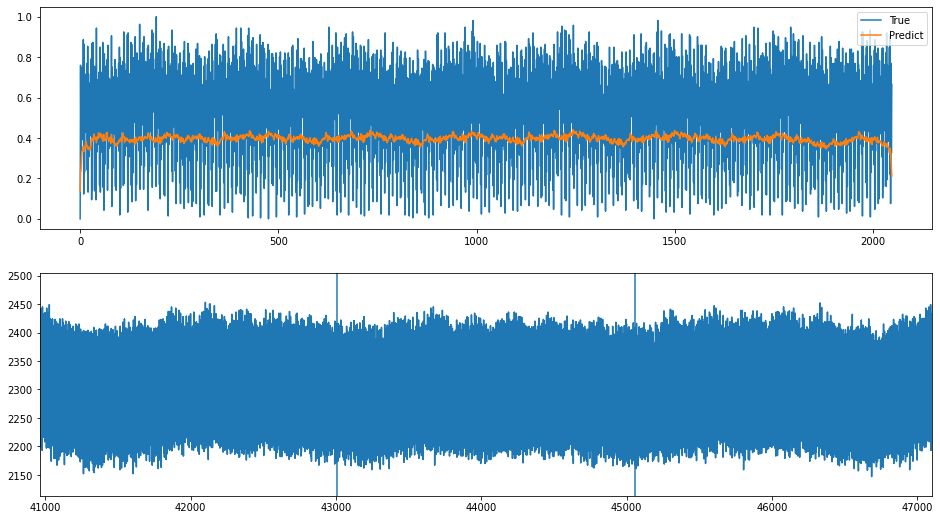

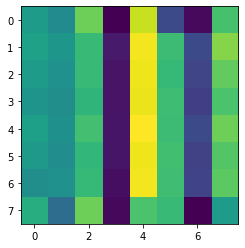

index: 218589
Error: 0.08738918865612756
type                                                         Inst
fill                                                         6452
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-03 03:01:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6452/...
n_bunches                                                     129
bunch_index                                                  2506
bunch_number                                                  103
ts_length                                                   65536
chunk                                                          22
Name: 5817, dtype: object


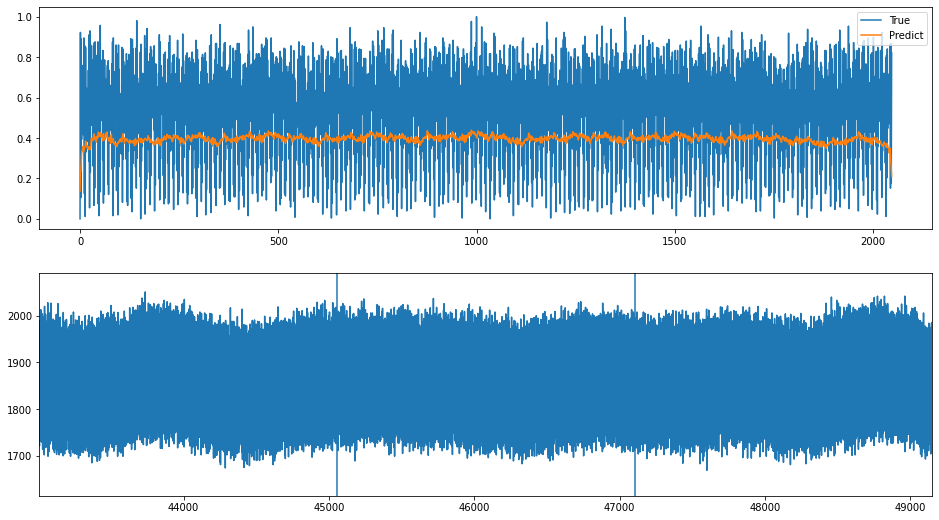

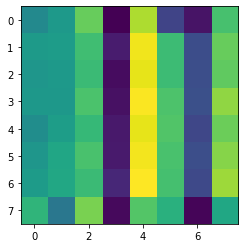

index: 248990
Error: 0.08735380743215537
type                                                         Inst
fill                                                         6438
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-30 18:02:29
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6438/...
n_bunches                                                       2
bunch_index                                                  2085
bunch_number                                                    1
ts_length                                                   65536
chunk                                                           5
Name: 1330, dtype: object


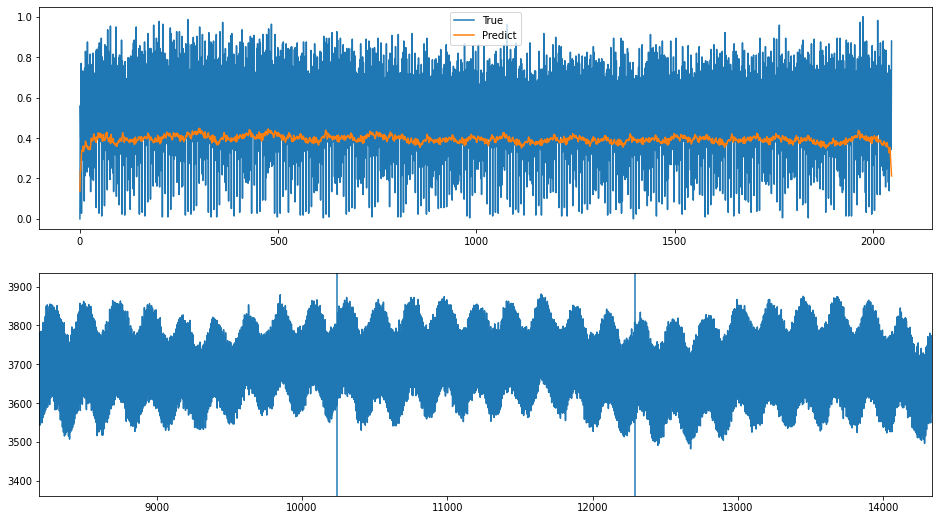

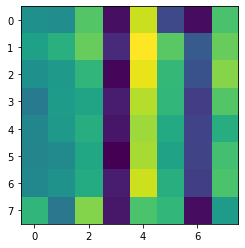

index: 176689
Error: 0.08728046368009314
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:17:44
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1534
bunch_number                                                   78
ts_length                                                   65536
chunk                                                           6
Name: 1763, dtype: object


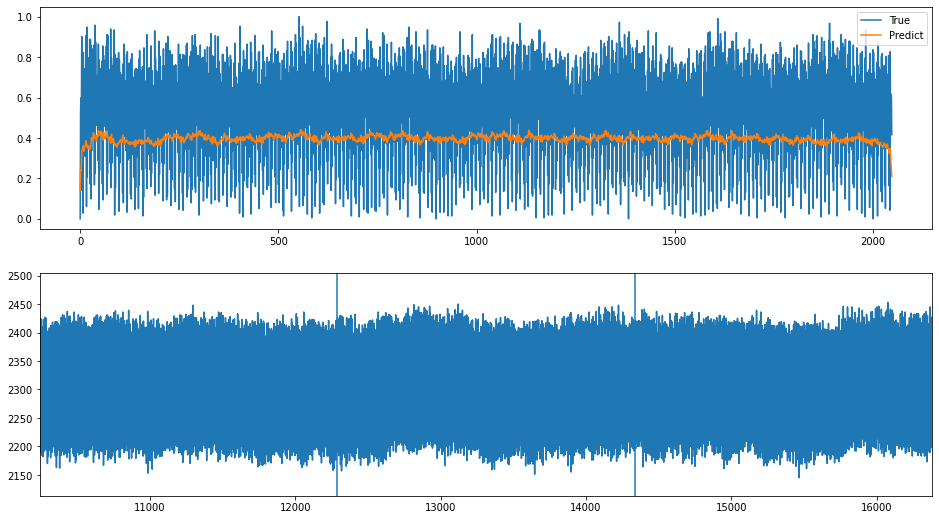

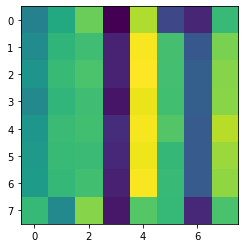

index: 246428
Error: 0.08714871509938857
type                                                         Inst
fill                                                         6438
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-30 18:02:29
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6438/...
n_bunches                                                       2
bunch_index                                                  2085
bunch_number                                                    1
ts_length                                                   65536
chunk                                                           2
Name: 562, dtype: object


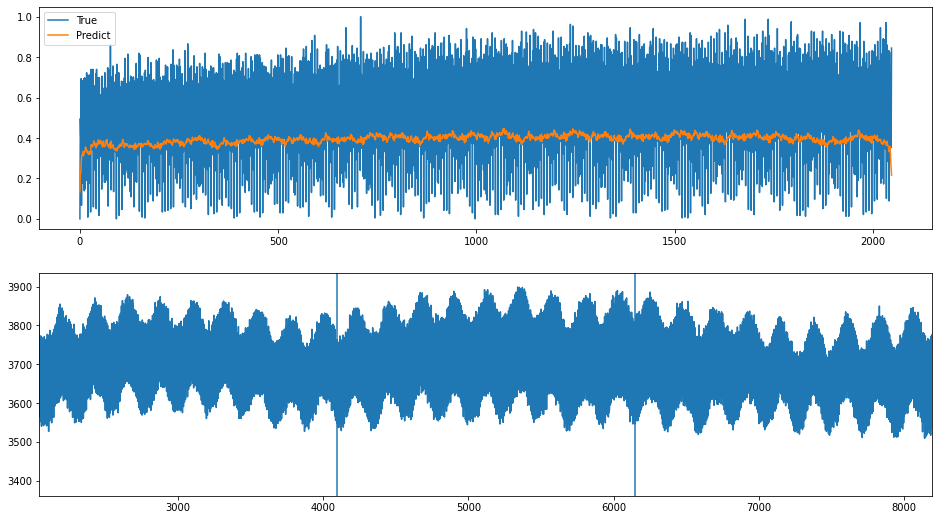

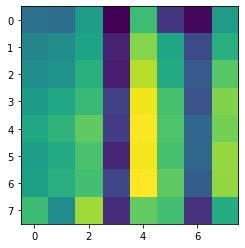

index: 99812
Error: 0.08707149969955999
type                                                         Inst
fill                                                         7024
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-05 07:38:23
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7024/...
n_bunches                                                     252
bunch_index                                                   100
bunch_number                                                   51
ts_length                                                   65536
chunk                                                          19
Name: 4946, dtype: object


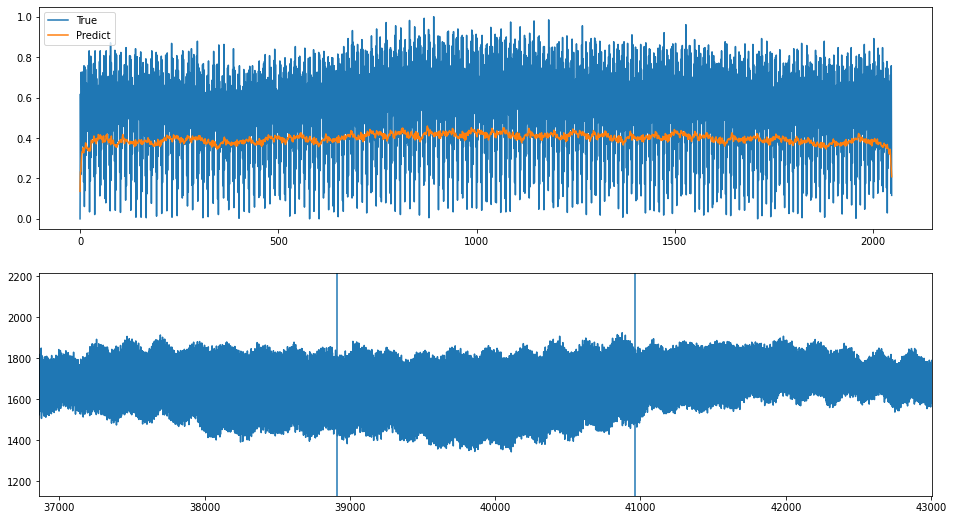

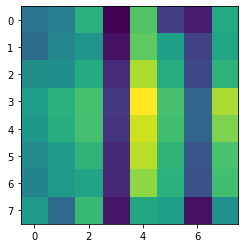

index: 245801
Error: 0.08702973607761251
type                                                         Inst
fill                                                         6438
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-30 18:02:29
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6438/...
n_bunches                                                       2
bunch_index                                                  2085
bunch_number                                                    1
ts_length                                                   65536
chunk                                                           6
Name: 1586, dtype: object


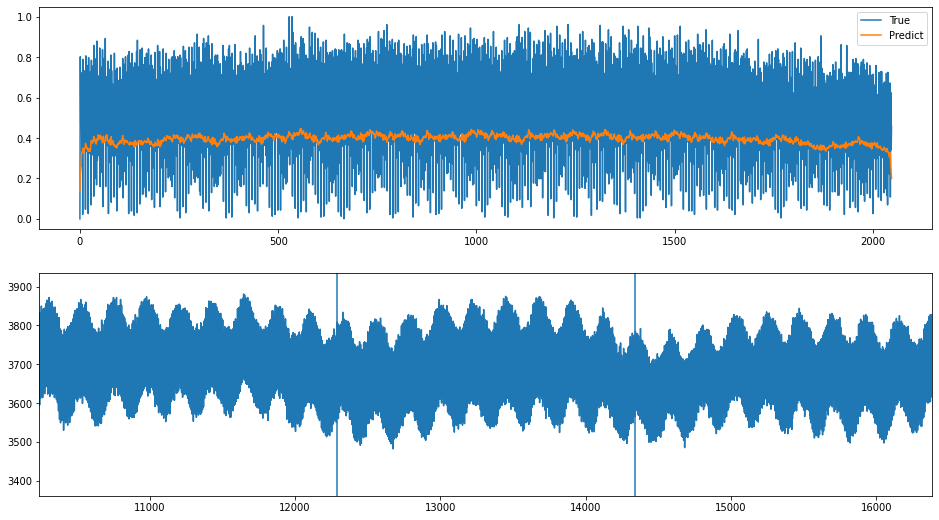

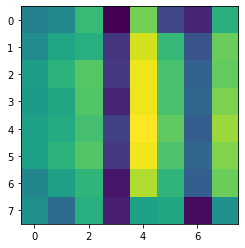

index: 251917
Error: 0.08679838430355016
type                                                         Inst
fill                                                         6438
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-30 18:02:29
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6438/...
n_bunches                                                       2
bunch_index                                                  2085
bunch_number                                                    1
ts_length                                                   65536
chunk                                                          27
Name: 6962, dtype: object


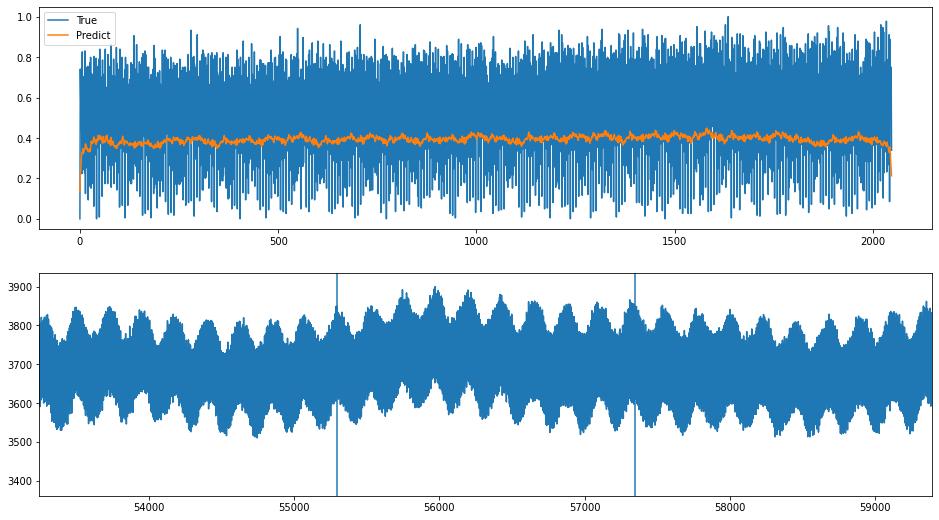

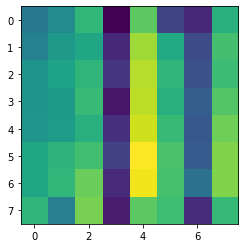

index: 246880
Error: 0.08675404395908642
type                                                         Inst
fill                                                         6438
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-30 18:02:29
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6438/...
n_bunches                                                       2
bunch_index                                                  2085
bunch_number                                                    1
ts_length                                                   65536
chunk                                                          20
Name: 5170, dtype: object


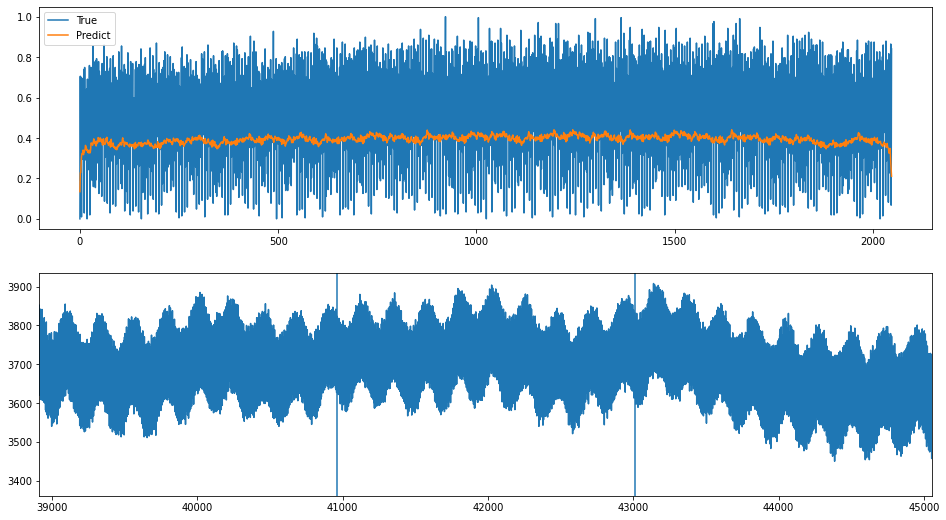

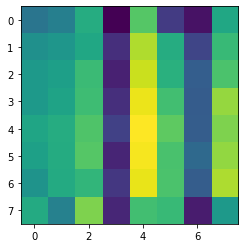

index: 247916
Error: 0.08667523087494992
type                                                         Inst
fill                                                         6438
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-30 18:02:29
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6438/...
n_bunches                                                       2
bunch_index                                                  2085
bunch_number                                                    1
ts_length                                                   65536
chunk                                                          29
Name: 7474, dtype: object


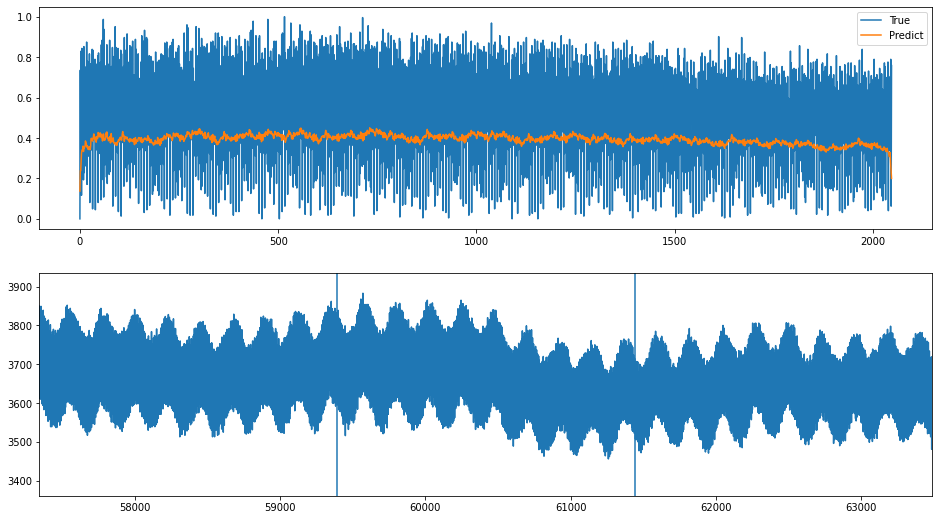

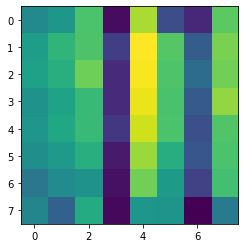

index: 172323
Error: 0.08665969768344327
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-02 23:17:44
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                  1534
bunch_number                                                   78
ts_length                                                   65536
chunk                                                           2
Name: 739, dtype: object


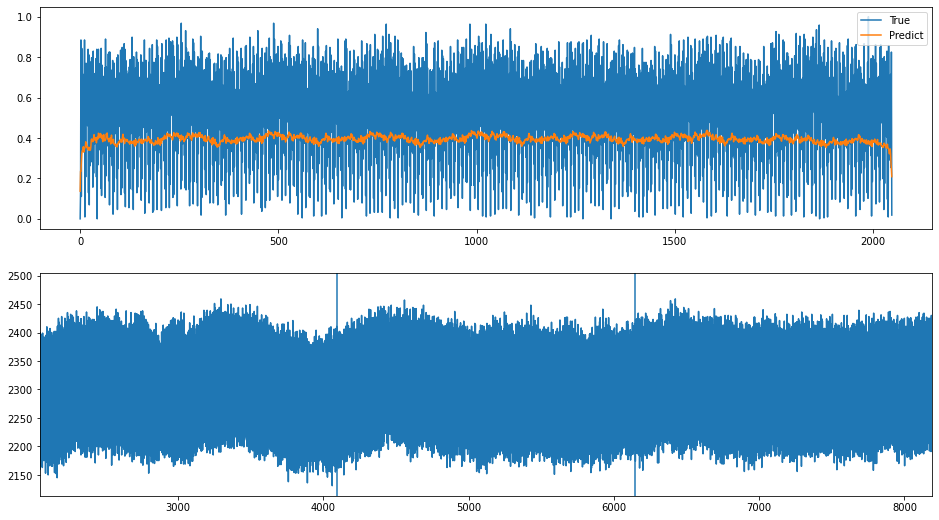

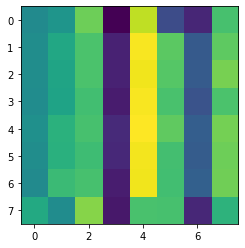

index: 215572
Error: 0.0866465754930711
type                                                         Inst
fill                                                         6452
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-03 03:01:17
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6452/...
n_bunches                                                     129
bunch_index                                                  2506
bunch_number                                                  103
ts_length                                                   65536
chunk                                                           0
Name: 185, dtype: object


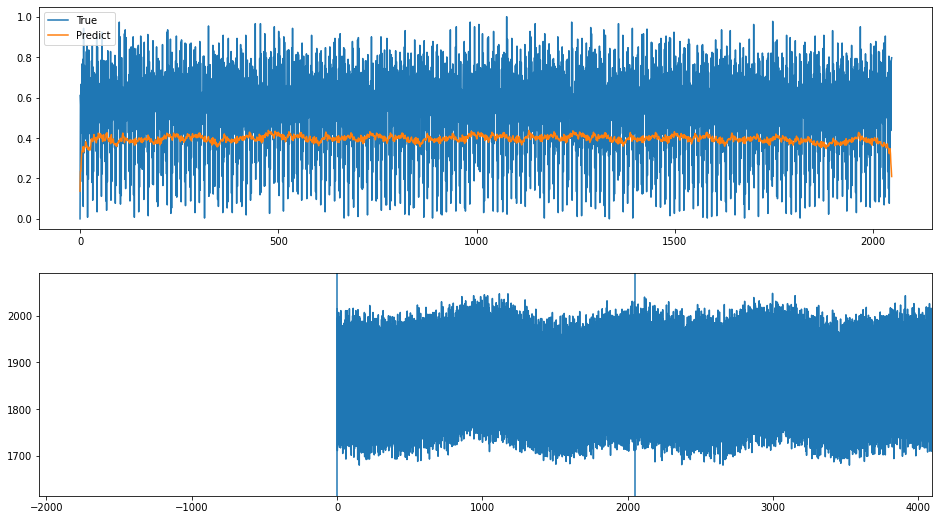

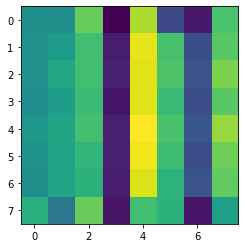

In [26]:
for i in range(1, 51):
    index = sorted_error_indices[-i]
    plot_train_index(index)

# Around the peak

In [27]:
error_around_peak = abs(train_error - hist_peak)
sorted_error_indices_around_peak = np.argsort(error_around_peak)

index: 57653
Error: 0.027858535748906118
type                                                         Inst
fill                                                         6901
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-08 03:10:53
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6901/...
n_bunches                                                     987
bunch_index                                                  2232
bunch_number                                                  604
ts_length                                                   65536
chunk                                                           3
Name: 911, dtype: object


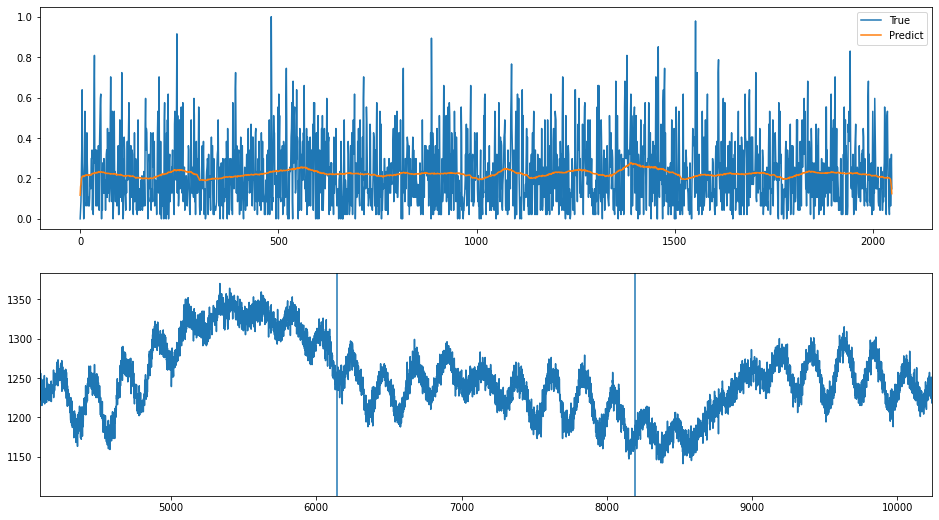

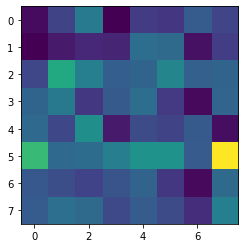

index: 22061
Error: 0.02785855203838896
type                                                         Inst
fill                                                         7269
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-08 23:31:09
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7269/...
n_bunches                                                     264
bunch_index                                                   450
bunch_number                                                   81
ts_length                                                   65536
chunk                                                          21
Name: 5619, dtype: object


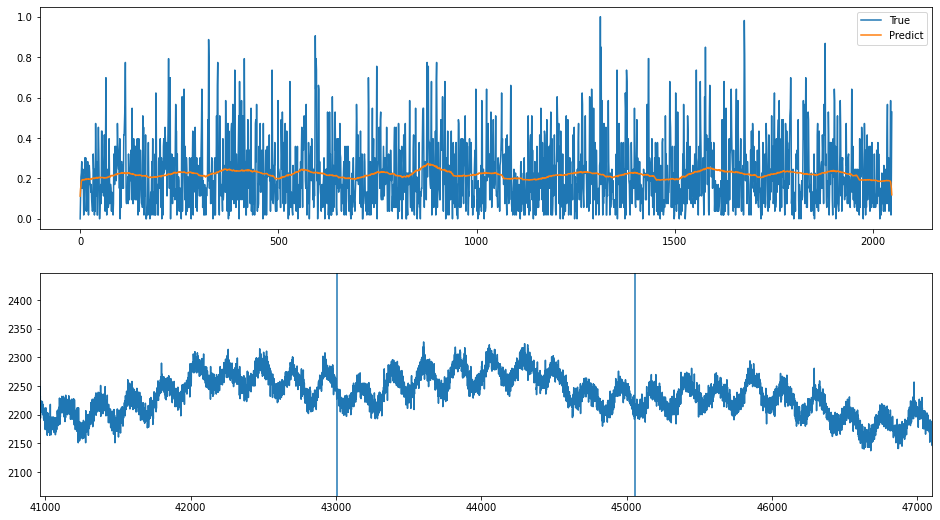

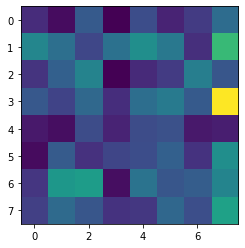

index: 385620
Error: 0.027858570869271574
type                                                         Inst
fill                                                         6711
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-22 02:01:55
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6711/...
n_bunches                                                     252
bunch_index                                                   100
bunch_number                                                   32
ts_length                                                   65536
chunk                                                           1
Name: 278, dtype: object


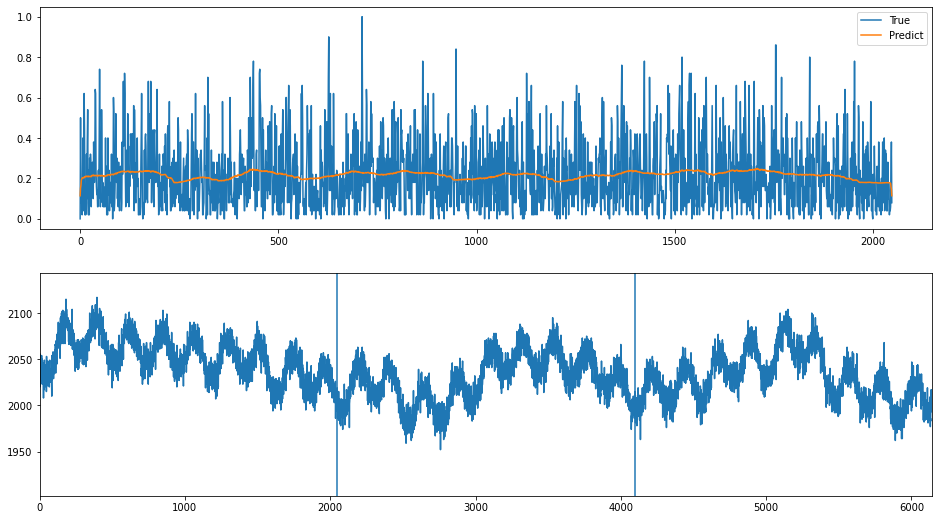

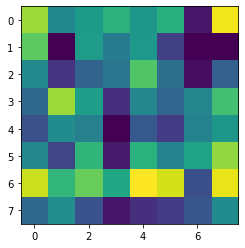

index: 4510
Error: 0.027858579150332637
type                                                         Inst
fill                                                         6255
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-29 07:17:54
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6255/...
n_bunches                                                    1916
bunch_index                                                   222
bunch_number                                                  109
ts_length                                                   65536
chunk                                                           9
Name: 2484, dtype: object


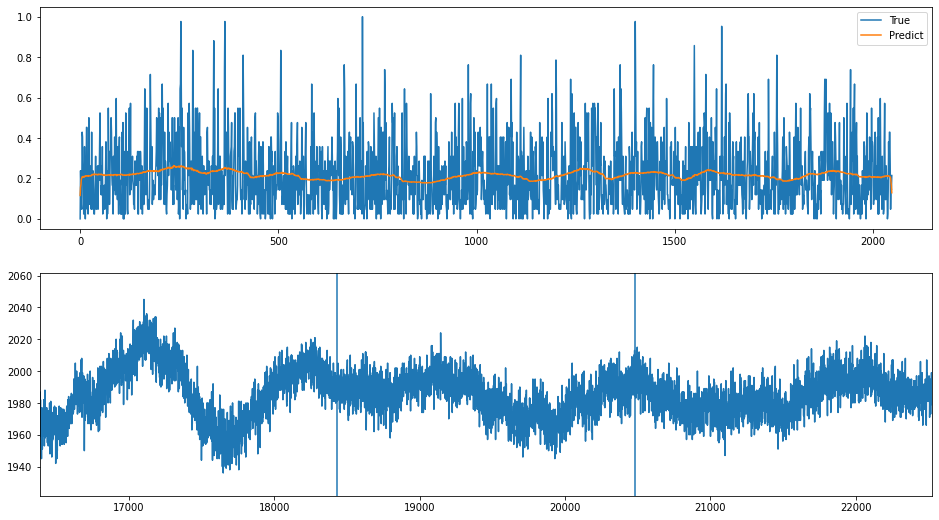

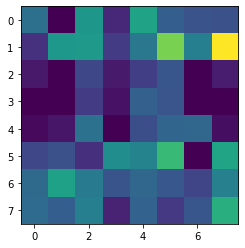

index: 73873
Error: 0.027858581192962507
type                                                         Inst
fill                                                         6415
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-25 04:14:41
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6415/...
n_bunches                                                     428
bunch_index                                                   654
bunch_number                                                  351
ts_length                                                   65536
chunk                                                          24
Name: 6144, dtype: object


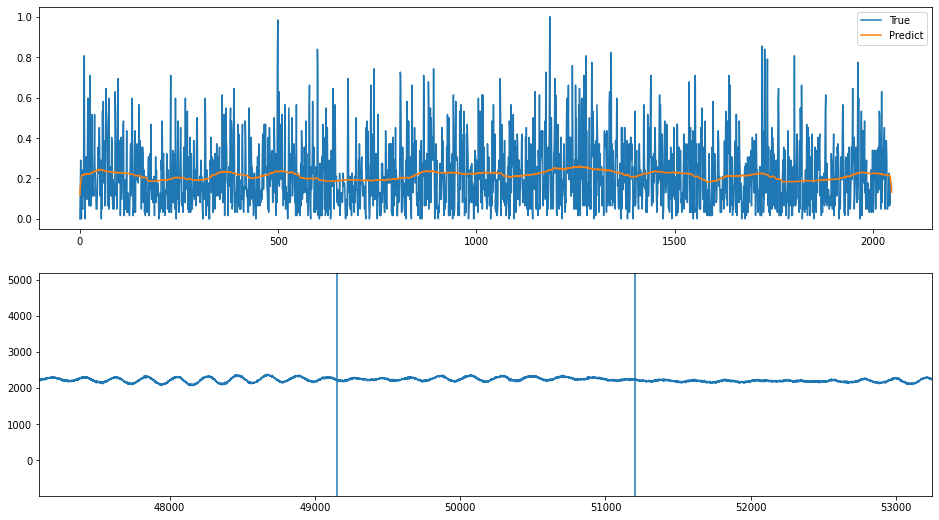

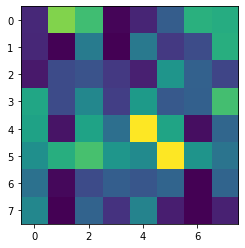

index: 250420
Error: 0.027858452238740453
type                                                         Inst
fill                                                         6702
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-20 00:33:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6702/...
n_bunches                                                    2556
bunch_index                                                   229
bunch_number                                                  123
ts_length                                                   65536
chunk                                                          22
Name: 5650, dtype: object


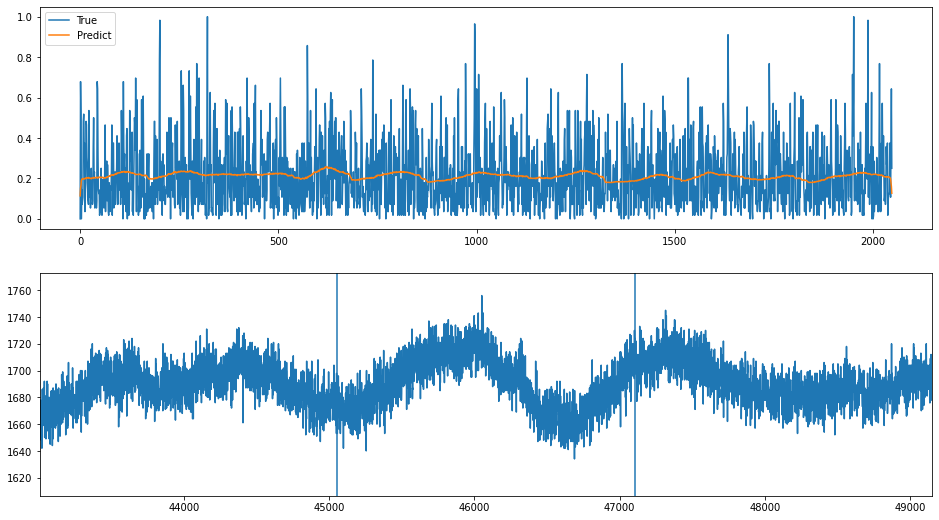

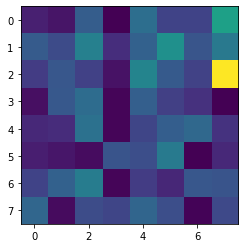

index: 48076
Error: 0.0278586203089856
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-07 03:40:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                    1868
bunch_index                                                   953
bunch_number                                                  510
ts_length                                                   65536
chunk                                                          31
Name: 7982, dtype: object


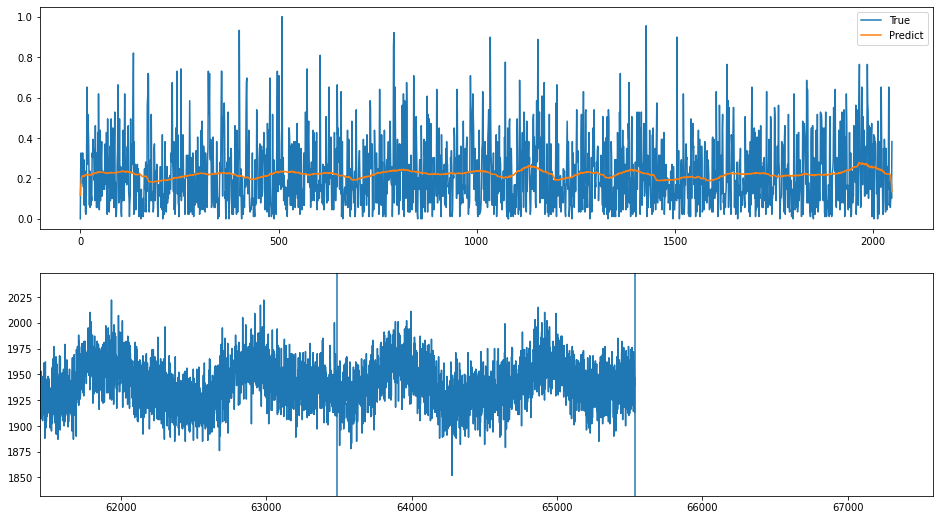

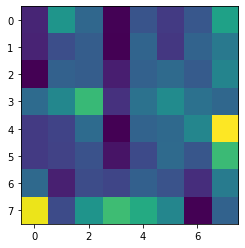

index: 324817
Error: 0.027858421627450912
type                                                         Inst
fill                                                         7235
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-29 17:16:52
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7235/...
n_bunches                                                     924
bunch_index                                                   336
bunch_number                                                  235
ts_length                                                   65536
chunk                                                          10
Name: 2597, dtype: object


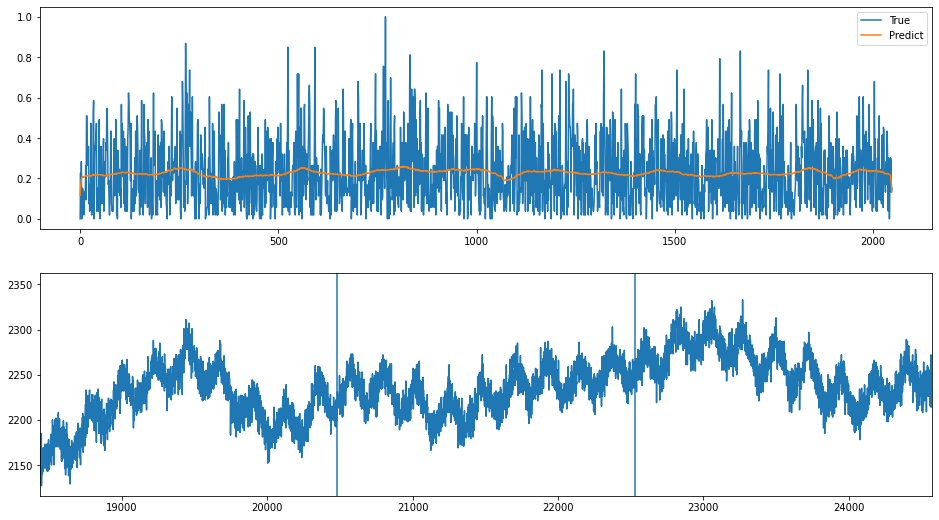

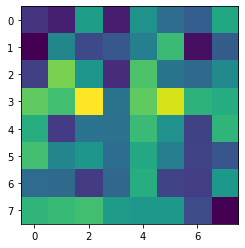

index: 148550
Error: 0.02785839452349819
type                                                         Inst
fill                                                         6702
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-19 23:20:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6702/...
n_bunches                                                    2556
bunch_index                                                   694
bunch_number                                                  491
ts_length                                                   65536
chunk                                                          30
Name: 7855, dtype: object


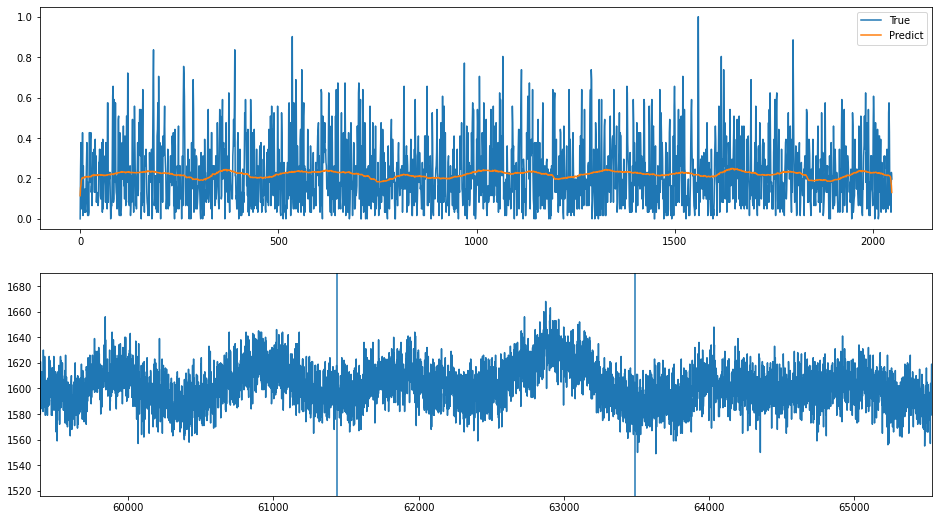

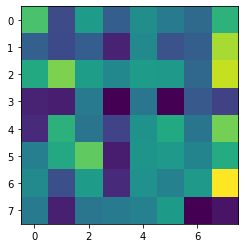

index: 45032
Error: 0.027858666570369242
type                                                         Inst
fill                                                         6278
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-06 23:04:10
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6278/...
n_bunches                                                     908
bunch_index                                                   654
bunch_number                                                  351
ts_length                                                   65536
chunk                                                           5
Name: 1280, dtype: object


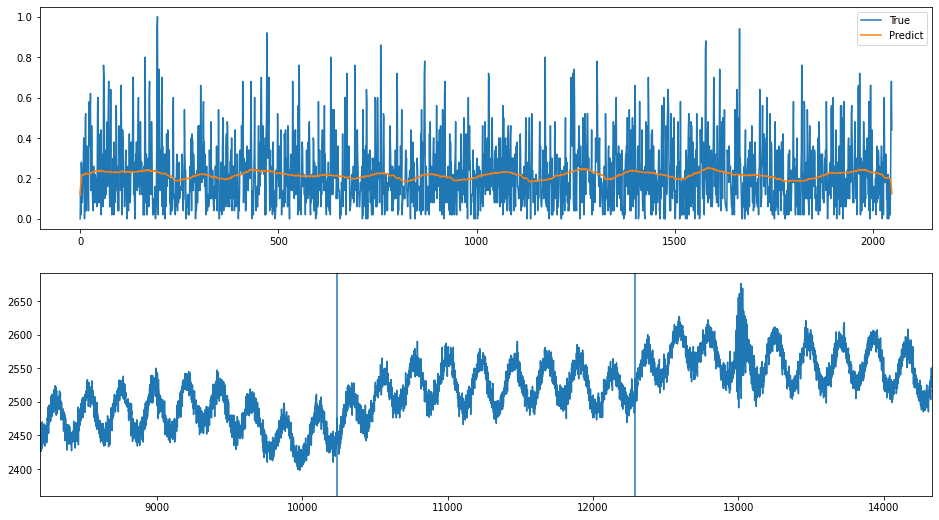

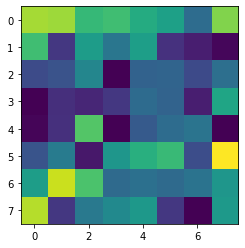

In [28]:
for i in range(10):
    index = sorted_error_indices_around_peak[i]
    plot_train_index(index)

# Around a point

In [29]:
# point = 

In [30]:
# error_around_peak = abs(train_error - point)
# sorted_error_indices_around_point = np.argsort(error_around_peak)

In [31]:
# for i in range(10):
#     index = sorted_error_indices_around_point[i]
#     plot_train_index(index)

# Clustering

In [34]:
checker.encoder.layers

In [46]:
indices = sorted_error_indices[-np.arange(1, 128+1)]
encoding_true = train_data[indices]
encoding_pred = train_prediction[indices]
encoding_meta = train_meta.iloc[indices]
encoded = np.array(checker.encoder(encoding_true)).squeeze()  # checker.encode(encoding_true)
encoded_2d = encoded.reshape(encoded.shape[0], -1)

In [47]:
encoded_2d.shape

(128, 64)

In [48]:
def plot_clusters(cluster_indices):
    print(f"N samples: {len(cluster_indices)}")
    fig, axes = plt.subplots(2,1, figsize=(12, 3))
    axes[0].plot(encoding_true[cluster_indices][:,:, 0].T, linewidth=0, marker=',', alpha=0.1)
    axes[1].plot(encoding_true[cluster_indices][:,:, 1].T, linewidth=0, marker=',', alpha=0.1)
    return fig, axes

In [49]:
import sklearn
from sklearn.manifold import TSNE

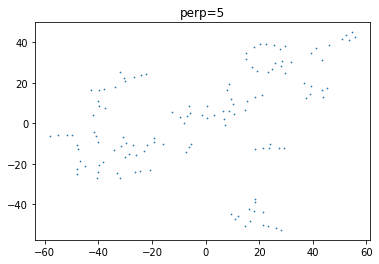

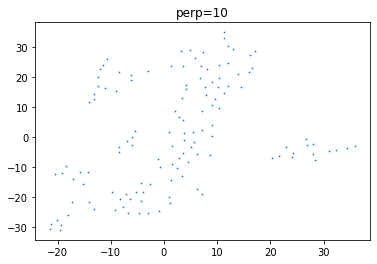

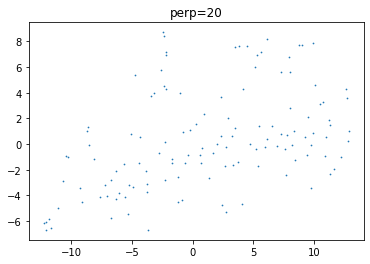

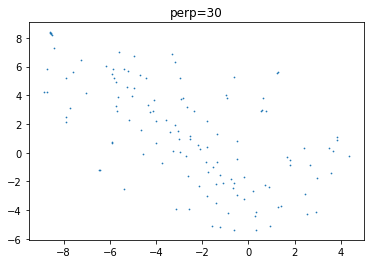

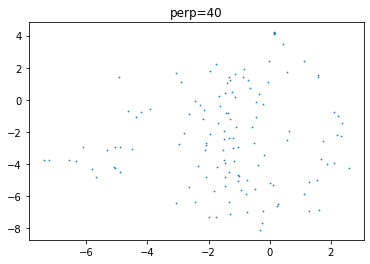

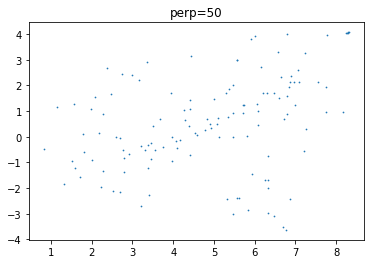

In [50]:
for perplexity in [5, 10, 20, 30, 40, 50]: 
    tsne = TSNE(perplexity=perplexity)
    encoded_2d_tsne = tsne.fit_transform(encoded_2d)
    plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2)
    plt.title(f"perp={perplexity}")
    plt.show()

In [51]:
tsne = TSNE(perplexity=30)
encoded_2d_tsne = tsne.fit_transform(encoded_2d)

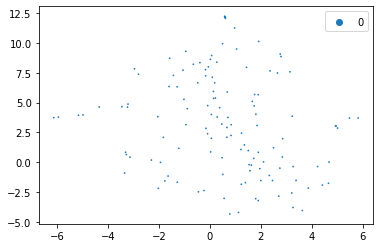

cluster 0
N samples: 128


IndexError: index 1 is out of bounds for axis 2 with size 1

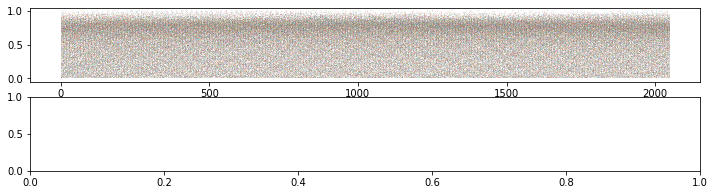

In [52]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=4)
clustering = dbscan.fit(encoded_2d_tsne)
sc = plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2, c=clustering.labels_, cmap='tab10')
plt.legend(*sc.legend_elements())
plt.show()
for cluster in np.unique(clustering.labels_):
    cluster_indices = np.where(clustering.labels_ == cluster)[0]
    print("cluster", cluster)
    fig, axes = plot_clusters(cluster_indices)
    plt.show()